# **IMAGE CAPTIONING**

## IMPORT MODULES

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 32.2 MB/s 
     |████████████████████████████████| 2.3 MB 56.1 MB/s 
     |████████████████████████████████| 106 kB 77.9 MB/s 
     |████████████████████████████████| 278 kB 78.8 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 55 kB 4.9 MB/s 
     |████████████████████████████████| 56 kB 6.0 MB/s 
     |████████████████████████████████| 84 kB 5.1 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 69 kB 8.8 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 50 kB 3.3 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=85d9426c7db0860604186c07e43c927aa27228c65662ab6f80152f01d089df8a
  Stored in direc

In [ ]:
# Processing, create I/O
import os
import io
import pickle
import numpy as np
import json
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import pandas as pd
# Download file
import urllib.request
# Show progress bar
from tqdm.notebook import tqdm
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes import Axes
# Load pretrained models
from tensorflow.keras.applications import vgg16, vgg19, inception_v3, resnet50, efficientnet_v2, densenet, inception_resnet_v2
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.densenet import DenseNet201, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
# Preprocessing
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Dropout, add
# Utils
from tensorflow.keras.utils import to_categorical, plot_model
# Metrics
from nltk.translate.bleu_score import corpus_bleu
#EarlyStopping
from keras.callbacks import EarlyStopping
# Demo
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
BASE_DIR = "/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data"
WORKING_DIR = "/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator"
TEST_DIR = "/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/Test"

## LOAD DATASET (from .json files)

In [ ]:
# train = open("/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/uitviic_captions_train2017.json")
# data_train = json.load(train)
# val = open("/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/uitviic_captions_val2017.json")
# data_val = json.load(val)
# test = open("/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/uitviic_captions_test2017.json")
# data_test = json.load(test)

### IMAGE

In [ ]:
# for i in tqdm(range(len(data_train['images']))):
#   image_URL = data_train['images'][i]['coco_url']
#   image_ID = data_train['images'][i]['id']
#   save_URL = os.path.join("/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/Vietnam Images", str(image_ID)+ '.jpg')
#   urllib.request.urlretrieve(image_URL, save_URL)

  0%|          | 0/2695 [00:00<?, ?it/s]

In [ ]:
# for i in tqdm(range(len(data_val['images']))):
#   image_URL = data_val['images'][i]['coco_url']
#   image_ID = data_val['images'][i]['id']
#   save_URL = os.path.join("/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/Vietnam Images", str(image_ID)+ '.jpg')
#   urllib.request.urlretrieve(image_URL, save_URL)

  0%|          | 0/924 [00:00<?, ?it/s]

In [ ]:
# for i in tqdm(range(len(data_test['images']))):
#   image_URL = data_test['images'][i]['coco_url']
#   image_ID = data_test['images'][i]['id']
#   save_URL = os.path.join("/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/Vietnam Images", str(image_ID)+ '.jpg')
#   urllib.request.urlretrieve(image_URL, save_URL)

  0%|          | 0/231 [00:00<?, ?it/s]

### CAPTION

In [ ]:
# with open('/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/Vietnam captions.txt', 'a', encoding='utf-8') as f:
#   for i in tqdm(range(len(data_train['annotations']))):
#     image_ID = data_train['annotations'][i]['image_id']
#     caption = data_train['annotations'][i]['caption']
#     f.write(str(image_ID))
#     f.write(",")
#     f.write(caption)
#     f.write("\n")
#   f.close()

  0%|          | 0/13481 [00:00<?, ?it/s]

In [ ]:
# with open('/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/Vietnam captions.txt', 'a', encoding='utf-8') as f:
#   for i in tqdm(range(len(data_val['annotations']))):
#     image_ID = data_val['annotations'][i]['image_id']
#     caption = data_val['annotations'][i]['caption']
#     f.write(str(image_ID))
#     f.write(",")
#     f.write(caption)
#     f.write("\n")
#   f.close()

  0%|          | 0/4620 [00:00<?, ?it/s]

In [ ]:
# with open('/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/Vietnam captions.txt', 'a', encoding='utf-8') as f:
#   for i in tqdm(range(len(data_test['annotations']))):
#     image_ID = data_test['annotations'][i]['image_id']
#     caption = data_test['annotations'][i]['caption']
#     f.write(str(image_ID))
#     f.write(",")
#     f.write(caption)
#     f.write("\n")
#   f.close()

  0%|          | 0/1155 [00:00<?, ?it/s]

## EXTRACT IMAGE FEATURES

### LOAD PRE-TRAINED MODELS

#### VGG-16

In [ ]:
# load VGG16 model
model_extract_VGG16 = VGG16()
# restructure the model
model_extract_VGG16 = Model(inputs=model_extract_VGG16.inputs, outputs=model_extract_VGG16.layers[-2].output)
# summarize
print(model_extract_VGG16.summary())

553467096/553467096 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

#### InceptionV3

In [ ]:
# load InceptionV3 model
model_extract_InceptionV3 = InceptionV3(weights = 'imagenet')
# restructure the model
input = model_extract_InceptionV3.input
output = model_extract_InceptionV3.layers[-2].output
model_extract_InceptionV3 = Model(inputs=input, outputs=output)
# summarize
print(model_extract_InceptionV3.summary())

96112376/96112376 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                

#### ResNet-50

In [ ]:
# load ResNet50 model
model_extract_ResNet50 = ResNet50(weights = "imagenet")
# restructure the model
input = model_extract_ResNet50.input
output = model_extract_ResNet50.layers[-2].output
model_extract_ResNet50 = Model(inputs=input, outputs=output)
# summarize
print(model_extract_ResNet50.summary())

102967424/102967424 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                         

#### VGG-19

In [ ]:
# load VGG19 model
model_extract_VGG19 = VGG19()
# restructure the model
model_extract_VGG19 = Model(inputs=model_extract_VGG19.inputs, outputs=model_extract_VGG19.layers[-2].output)
# summarize
print(model_extract_VGG19.summary())

574710816/574710816 [==============================] - 3s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

#### EfficientV2L

In [ ]:
# load EfficientV2L model
model_extract_EfficientNetV2L = EfficientNetV2L()
# restructue the model
model_extract_EfficientNetV2L = Model(inputs=model_extract_EfficientNetV2L.inputs, outputs=model_extract_EfficientNetV2L.layers[-2].output)
# summarize
print(model_extract_EfficientNetV2L.summary())

478307632/478307632 [==============================] - 3s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_5[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 32  864         ['rescaling[0][0]']              
                                )                                                                 
                         

#### DenseNet201

In [ ]:
# load DenseNet201 model
model_extract_DenseNet201 = DenseNet201()
# restructure the model
model_extract_DenseNet201 = Model(inputs=model_extract_DenseNet201.inputs, outputs=model_extract_DenseNet201.layers[-2].output)
# summarize
print(model_extract_DenseNet201.summary())

82524592/82524592 [==============================] - 0s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_6[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                           

#### InceptionResNetV2

In [ ]:
# load InceptionResNetV2 model
model_extract_InceptionResNetV2 = InceptionResNetV2()
# restructure the model
model_extract_InceptionResNetV2 = Model(inputs=model_extract_InceptionResNetV2.inputs, outputs=model_extract_InceptionResNetV2.layers[-2].output)
# summarize
print(model_extract_InceptionResNetV2.summary())

225209952/225209952 [==============================] - 2s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)           

### EXTRACT FEATURES

In [ ]:
features_vietnam_VGG16 = {}
features_vietnam_InceptionV3 = {}
features_vietnam_ResNet50 = {}
features_vietnam_VGG19 = {}
features_vietnam_EfficientNetV2L = {}
features_vietnam_InceptionResNetV2 = {}
features_vietnam_DenseNet201 = {}
directory = "/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/Vietnam Images"

#### VGG-16

In [ ]:
# extract features from image
for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = vgg16.preprocess_input(image)
    # extract features
    feature = model_extract_VGG16.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features_vietnam_VGG16[image_id] = feature

  0%|          | 0/3850 [00:00<?, ?it/s]

#### InceptionV3

In [ ]:
# extract features from image
for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(299, 299))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = inception_v3.preprocess_input(image)
    # extract features
    feature = model_extract_InceptionV3.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features_vietnam_InceptionV3[image_id] = feature

  0%|          | 0/3850 [00:00<?, ?it/s]

#### ResNet50

In [ ]:
# extract features from image
for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = resnet50.preprocess_input(image)
    # extract features
    feature = model_extract_ResNet50.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features_vietnam_ResNet50[image_id] = feature

  0%|          | 0/3850 [00:00<?, ?it/s]

#### VGG-19

In [ ]:
# extract features from image
for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = vgg19.preprocess_input(image)
    # extract features
    feature = model_extract_VGG19.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features_vietnam_VGG19[image_id] = feature

  0%|          | 0/3850 [00:00<?, ?it/s]

#### EfficientNetV2L

In [ ]:
# extract features from image
for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(480, 480))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = efficientnet_v2.preprocess_input(image)
    # extract features
    feature = model_extract_EfficientNetV2L.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features_vietnam_EfficientNetV2L[image_id] = feature

  0%|          | 0/3850 [00:00<?, ?it/s]

#### InceptionResNetV2

In [ ]:
# extract features from image
for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(299, 299))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = inception_resnet_v2.preprocess_input(image)
    # extract features
    feature = model_extract_InceptionResNetV2.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features_vietnam_InceptionResNetV2[image_id] = feature

  0%|          | 0/3850 [00:00<?, ?it/s]

#### DenseNet201

In [ ]:
# extract features from image
for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = densenet.preprocess_input(image)
    # extract features
    feature = model_extract_DenseNet201.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features_vietnam_DenseNet201[image_id] = feature

  0%|          | 0/3850 [00:00<?, ?it/s]

### SAVE & LOAD FEATURES

In [ ]:
features_path = os.path.join(WORKING_DIR + '/Features/')
features_path

'/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Features/'

#### SAVE

In [ ]:
# store features in pickle
pickle.dump(features_vietnam_VGG16, open(os.path.join(features_path, 'features_vietnam_VGG16.pkl'), 'wb'))

In [ ]:
# store features in pickle
pickle.dump(features_vietnam_InceptionV3, open(os.path.join(features_path, 'features_vietnam_InceptionV3.pkl'), 'wb'))

In [ ]:
# store features in pickle
pickle.dump(features_vietnam_ResNet50, open(os.path.join(features_path, 'features_vietnam_ResNet50.pkl'), 'wb'))

In [ ]:
# store features in pickle
pickle.dump(features_vietnam_VGG19, open(os.path.join(features_path, 'features_vietnam_VGG19.pkl'), 'wb'))

In [ ]:
# store features in pickle
pickle.dump(features_vietnam_EfficientNetV2L, open(os.path.join(features_path, 'features_vietnam_EfficientNetV2L.pkl'), 'wb'))

In [ ]:
# store features in pickle
pickle.dump(features_vietnam_InceptionResNetV2, open(os.path.join(features_path, 'features_vietnam_InceptionResNetV2.pkl'), 'wb'))

In [ ]:
# store features in pickle
pickle.dump(features_vietnam_DenseNet201, open(os.path.join(features_path, 'features_vietnam_DenseNet201.pkl'), 'wb'))

#### LOAD

In [ ]:
# load features from pickle
with open(os.path.join(features_path, 'features_vietnam_VGG16.pkl'), 'rb') as f:
    features_vietnam_VGG16 = pickle.load(f)

In [ ]:
# load features from pickle
with open(os.path.join(features_path, 'features_vietnam_InceptionV3.pkl'), 'rb') as f:
    features_vietnam_InceptionV3 = pickle.load(f)

In [ ]:
# load features from pickle
with open(os.path.join(features_path, 'features_vietnam_ResNet50.pkl'), 'rb') as f:
    features_vietnam_ResNet50 = pickle.load(f)

In [ ]:
# load features from pickle
with open(os.path.join(features_path, 'features_vietnam_VGG19.pkl'), 'rb') as f:
    features_vietnam_VGG19 = pickle.load(f)

In [ ]:
# load features from pickle
with open(os.path.join(features_path, 'features_vietnam_EfficientNetV2L.pkl'), 'rb') as f:
    features_vietnam_EfficientNetV2L = pickle.load(f)

In [ ]:
# load features from pickle
with open(os.path.join(features_path, 'features_vietnam_InceptionResNetV2.pkl'), 'rb') as f:
    features_vietnam_InceptionResNetV2 = pickle.load(f)

In [ ]:
# load features from pickle
with open(os.path.join(features_path, 'features_vietnam_DenseNet201.pkl'), 'rb') as f:
    features_vietnam_DenseNet201 = pickle.load(f)

## PREPROCESS TEXT DATA

### LOAD CAPTIONS

In [ ]:
with open(os.path.join(BASE_DIR, 'Vietnam captions.txt'), 'r') as f:
    captions_doc = f.read()

### MAPPING IMAGE-ID & CAPTIONS

In [ ]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/19257 [00:00<?, ?it/s]

### PREPROCESS

In [ ]:
def preprocess(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc.,
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [ ]:
# before preprocess of text
mapping['100034']

['Những đứa trẻ đang cầm vợt tennis và đứng ở trên sân .',
 'Cô bé áo xanh đang chuẩn bị đánh quả bóng tennis .',
 'Những đứa trẻ đang chờ tới lượt để tập đánh bóng ở trên sân tennis .',
 'Những đứa trẻ đang chuẩn bị đánh quả bóng tennis .',
 'Những đứa trẻ đang xếp thành hàng ở trên sân tennis .']

In [ ]:
# preprocess the text
preprocess(mapping)

In [ ]:
# after preprocess of text
mapping['100034']

['startseq những đứa trẻ đang cầm vợt tennis và đứng trên sân endseq',
 'startseq cô bé áo xanh đang chuẩn bị đánh quả bóng tennis endseq',
 'startseq những đứa trẻ đang chờ tới lượt để tập đánh bóng trên sân tennis endseq',
 'startseq những đứa trẻ đang chuẩn bị đánh quả bóng tennis endseq',
 'startseq những đứa trẻ đang xếp thành hàng trên sân tennis endseq']

### TOKENIZE TEXT

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
print(len(all_captions))
all_captions[:10]

In [ ]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1351


In [ ]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
print(max_length)

35


## TRAIN TEST SPLIT

In [ ]:
image_ids = list(mapping.keys())
split_1 = int(len(image_ids) * 0.80)
split_2 = int(len(image_ids) * 0.10 + split_1)
train = image_ids[:split_1]
val = image_ids[split_1:split_2]
test = image_ids[split_2:]

## CREATE MODELS

### MODEL GENERATE DATA

In [ ]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

### PREDICT MODELS

#### CNN + LSTM/GRU + VGG16/VGG19

In [ ]:
# LSTM
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
LSTM_VGG16_model = Model(inputs=[inputs1, inputs2], outputs=outputs)
LSTM_VGG19_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
LSTM_VGG16_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)
LSTM_VGG19_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)

# GRU
# encoded model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = GRU(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
GRU_VGG16_model = Model(inputs=[inputs1, inputs2], outputs=outputs)
GRU_VGG19_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
GRU_VGG16_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)
GRU_VGG19_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)

#### CNN + LSTM/GRU + InceptionV3/ResNet50

In [ ]:
# LSTM
# encoder model
# image feature layers
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
LSTM_ResNet50_model = Model(inputs=[inputs1, inputs2], outputs=outputs)
LSTM_InceptionV3_model =  Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
LSTM_ResNet50_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)
LSTM_InceptionV3_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)

# GRU
# encoded model
# image feature layers
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = GRU(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
GRU_ResNet50_model = Model(inputs=[inputs1, inputs2], outputs=outputs)
GRU_InceptionV3_model =  Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
GRU_ResNet50_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)
GRU_InceptionV3_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)

#### CNN + LSTM/GRU + EfficientNetV2L

In [ ]:
# LSTM
# encoder model
# image feature layers
inputs1 = Input(shape=(1280,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
LSTM_EfficientNetV2L_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
LSTM_EfficientNetV2L_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = opt)

# GRU
# encoded model
# image feature layers
inputs1 = Input(shape=(1280,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = GRU(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
GRU_EfficientNetV2L_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
GRU_EfficientNetV2L_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'],optimizer = opt)

#### CNN + LSTM/GRU + InceptionResNetV2

In [ ]:
# LSTM
# encoder model
# image feature layers
inputs1 = Input(shape=(1536,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
LSTM_InceptionResNetV2_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
LSTM_InceptionResNetV2_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)

# GRU
# encoded model
# image feature layers
inputs1 = Input(shape=(1536,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = GRU(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
GRU_InceptionResNetV2_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
GRU_InceptionResNetV2_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)

#### CNN + LSTM/GRU + DenseNet201

In [ ]:
# LSTM
# encoder model
# image feature layers
inputs1 = Input(shape=(1920,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
LSTM_DenseNet201_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
LSTM_DenseNet201_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)

# GRU
# encoded model
# image feature layers
inputs1 = Input(shape=(1920,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = GRU(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# merge models
GRU_DenseNet201_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# compile models
opt = keras.optimizers.Adam(learning_rate=0.0005)
GRU_DenseNet201_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = opt)

## FEED MODELS

In [ ]:
# save and load model path
model_path = os.path.join(WORKING_DIR + "/Models/")
history_path = os.path.join(WORKING_DIR + "/History/")

In [ ]:
epochs = 50
batch_size = 32
steps = len(train) // batch_size
val_steps = len(val) // batch_size
callback = EarlyStopping(monitor="val_loss", patience=2)

### TRAINING & SAVE MODELS

#### LSTM/GRU + VGG16

In [ ]:
# train the model
print("Training GRU_VGG16_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_VGG16, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_VGG16, tokenizer, max_length, vocab_size, batch_size)
# model fit
GRU_VGG16_history = GRU_VGG16_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "GRU_VGG16_model.h5")
GRU_VGG16_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "GRU_VGG16_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(GRU_VGG16_history.history, his)

Training GRU_VGG16_model:
Epoch 1/50
96/96 [==============================] - 32s 272ms/step - loss: 4.2050 - accuracy: 0.1604 - val_loss: 3.2970 - val_accuracy: 0.3198
Epoch 2/50
96/96 [==============================] - 23s 244ms/step - loss: 2.6210 - accuracy: 0.4587 - val_loss: 2.1113 - val_accuracy: 0.5524
Epoch 3/50
96/96 [==============================] - 32s 329ms/step - loss: 1.8863 - accuracy: 0.5810 - val_loss: 1.7460 - val_accuracy: 0.6111
Epoch 4/50
96/96 [==============================] - 23s 239ms/step - loss: 1.6100 - accuracy: 0.6251 - val_loss: 1.6035 - val_accuracy: 0.6356
Epoch 5/50
96/96 [==============================] - 24s 246ms/step - loss: 1.4578 - accuracy: 0.6507 - val_loss: 1.5162 - val_accuracy: 0.6490
Epoch 6/50
96/96 [==============================] - 24s 250ms/step - loss: 1.3528 - accuracy: 0.6657 - val_loss: 1.4611 - val_accuracy: 0.6561
Epoch 7/50
96/96 [==============================] - 24s 246ms/step - loss: 1.2721 - accuracy: 0.6788 - val_loss: 1.4

In [ ]:
# train the model
print("Training LSTM_VGG16_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_VGG16, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_VGG16, tokenizer, max_length, vocab_size, batch_size)
# model fit
LSTM_VGG16_history = LSTM_VGG16_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "LSTM_VGG16_model.h5")
LSTM_VGG16_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "LSTM_VGG16_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(LSTM_VGG16_history.history, his)

Training LSTM_VGG16_model:
Epoch 1/50
96/96 [==============================] - 27s 240ms/step - loss: 4.2877 - accuracy: 0.1409 - val_loss: 3.6485 - val_accuracy: 0.2172
Epoch 2/50
96/96 [==============================] - 21s 222ms/step - loss: 3.2387 - accuracy: 0.3031 - val_loss: 2.7468 - val_accuracy: 0.4373
Epoch 3/50
96/96 [==============================] - 22s 229ms/step - loss: 2.3506 - accuracy: 0.5007 - val_loss: 2.0762 - val_accuracy: 0.5597
Epoch 4/50
96/96 [==============================] - 23s 240ms/step - loss: 1.8577 - accuracy: 0.5867 - val_loss: 1.7789 - val_accuracy: 0.6097
Epoch 5/50
96/96 [==============================] - 22s 225ms/step - loss: 1.6024 - accuracy: 0.6294 - val_loss: 1.6272 - val_accuracy: 0.6369
Epoch 6/50
96/96 [==============================] - 22s 229ms/step - loss: 1.4486 - accuracy: 0.6529 - val_loss: 1.5398 - val_accuracy: 0.6469
Epoch 7/50
96/96 [==============================] - 22s 225ms/step - loss: 1.3447 - accuracy: 0.6692 - val_loss: 1.

#### LSTM/GRU + InceptionV3

In [ ]:
# train the model
print("Training GRU_InceptionV3_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_InceptionV3, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_InceptionV3, tokenizer, max_length, vocab_size, batch_size)
# model fit
GRU_InceptionV3_history = GRU_InceptionV3_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "GRU_InceptionV3_model.h5")
GRU_InceptionV3_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "GRU_InceptionV3_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(GRU_InceptionV3_history.history, his)

Training GRU_InceptionV3_model:
Epoch 1/50
96/96 [==============================] - 26s 232ms/step - loss: 4.2114 - accuracy: 0.1816 - val_loss: 3.1234 - val_accuracy: 0.3888
Epoch 2/50
96/96 [==============================] - 21s 220ms/step - loss: 2.4577 - accuracy: 0.4951 - val_loss: 1.9842 - val_accuracy: 0.5752
Epoch 3/50
96/96 [==============================] - 21s 218ms/step - loss: 1.8142 - accuracy: 0.5942 - val_loss: 1.6714 - val_accuracy: 0.6240
Epoch 4/50
96/96 [==============================] - 21s 217ms/step - loss: 1.5883 - accuracy: 0.6306 - val_loss: 1.5486 - val_accuracy: 0.6424
Epoch 5/50
96/96 [==============================] - 20s 211ms/step - loss: 1.4639 - accuracy: 0.6493 - val_loss: 1.4643 - val_accuracy: 0.6544
Epoch 6/50
96/96 [==============================] - 21s 218ms/step - loss: 1.3738 - accuracy: 0.6631 - val_loss: 1.4130 - val_accuracy: 0.6628
Epoch 7/50
96/96 [==============================] - 21s 218ms/step - loss: 1.3051 - accuracy: 0.6732 - val_los

In [ ]:
# train the model
print("Training LSTM_InceptionV3_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_InceptionV3, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_InceptionV3, tokenizer, max_length, vocab_size, batch_size)
# model fit
LSTM_InceptionV3_history = LSTM_InceptionV3_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "LSTM_InceptionV3_model.h5")
LSTM_InceptionV3_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "LSTM_InceptionV3_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(LSTM_InceptionV3_history.history, his)

Training LSTM_InceptionV3_model:
Epoch 1/50
96/96 [==============================] - 29s 242ms/step - loss: 4.2920 - accuracy: 0.1506 - val_loss: 3.5674 - val_accuracy: 0.2477
Epoch 2/50
96/96 [==============================] - 23s 238ms/step - loss: 3.0985 - accuracy: 0.3497 - val_loss: 2.5978 - val_accuracy: 0.4619
Epoch 3/50
96/96 [==============================] - 21s 224ms/step - loss: 2.2350 - accuracy: 0.5218 - val_loss: 1.9454 - val_accuracy: 0.5762
Epoch 4/50
96/96 [==============================] - 21s 224ms/step - loss: 1.7893 - accuracy: 0.5989 - val_loss: 1.6980 - val_accuracy: 0.6229
Epoch 5/50
96/96 [==============================] - 22s 225ms/step - loss: 1.5827 - accuracy: 0.6338 - val_loss: 1.5616 - val_accuracy: 0.6479
Epoch 6/50
96/96 [==============================] - 21s 223ms/step - loss: 1.4523 - accuracy: 0.6532 - val_loss: 1.4850 - val_accuracy: 0.6580
Epoch 7/50
96/96 [==============================] - 21s 221ms/step - loss: 1.3686 - accuracy: 0.6666 - val_lo

#### LSTM/GRU + ResNet50

In [ ]:
# train the model
print("Training GRU_ResNet50_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_ResNet50, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_ResNet50, tokenizer, max_length, vocab_size, batch_size)
# model fit
GRU_ResNet50_history = GRU_ResNet50_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "GRU_ResNet50_model.h5")
GRU_ResNet50_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "GRU_ResNet50_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(GRU_ResNet50_history.history, his)

Training GRU_ResNet50_model:
Epoch 1/50
96/96 [==============================] - 27s 243ms/step - loss: 4.2258 - accuracy: 0.1566 - val_loss: 3.3772 - val_accuracy: 0.3088
Epoch 2/50
96/96 [==============================] - 22s 223ms/step - loss: 2.7243 - accuracy: 0.4429 - val_loss: 2.1289 - val_accuracy: 0.5502
Epoch 3/50
96/96 [==============================] - 21s 221ms/step - loss: 1.9279 - accuracy: 0.5749 - val_loss: 1.7432 - val_accuracy: 0.6104
Epoch 4/50
96/96 [==============================] - 22s 225ms/step - loss: 1.6437 - accuracy: 0.6183 - val_loss: 1.5915 - val_accuracy: 0.6365
Epoch 5/50
96/96 [==============================] - 21s 222ms/step - loss: 1.4918 - accuracy: 0.6439 - val_loss: 1.4981 - val_accuracy: 0.6483
Epoch 6/50
96/96 [==============================] - 22s 224ms/step - loss: 1.3847 - accuracy: 0.6607 - val_loss: 1.4412 - val_accuracy: 0.6582
Epoch 7/50
96/96 [==============================] - 22s 226ms/step - loss: 1.3067 - accuracy: 0.6732 - val_loss: 

In [ ]:
# train the model
print("Training LSTM_ResNet50_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_ResNet50, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_ResNet50, tokenizer, max_length, vocab_size, batch_size)
# model fit
LSTM_ResNet50_history = LSTM_ResNet50_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "LSTM_ResNet50_model.h5")
LSTM_ResNet50_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "LSTM_ResNet50_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(LSTM_ResNet50_history.history, his)

Training LSTM_ResNet50_model:
Epoch 1/50
96/96 [==============================] - 28s 231ms/step - loss: 4.2487 - accuracy: 0.1433 - val_loss: 3.6038 - val_accuracy: 0.2219
Epoch 2/50
96/96 [==============================] - 21s 220ms/step - loss: 3.1465 - accuracy: 0.3305 - val_loss: 2.6284 - val_accuracy: 0.4491
Epoch 3/50
96/96 [==============================] - 20s 210ms/step - loss: 2.2691 - accuracy: 0.5175 - val_loss: 1.9703 - val_accuracy: 0.5797
Epoch 4/50
96/96 [==============================] - 20s 208ms/step - loss: 1.8093 - accuracy: 0.5960 - val_loss: 1.7129 - val_accuracy: 0.6196
Epoch 5/50
96/96 [==============================] - 20s 208ms/step - loss: 1.5851 - accuracy: 0.6317 - val_loss: 1.5692 - val_accuracy: 0.6432
Epoch 6/50
96/96 [==============================] - 20s 212ms/step - loss: 1.4482 - accuracy: 0.6533 - val_loss: 1.4876 - val_accuracy: 0.6544
Epoch 7/50
96/96 [==============================] - 21s 222ms/step - loss: 1.3539 - accuracy: 0.6674 - val_loss:

#### LSTM/GRU + VGG19

In [ ]:
# train the model
print("Training GRU_VGG19_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_VGG19, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_VGG19, tokenizer, max_length, vocab_size, batch_size)
# model fit
GRU_VGG19_history = GRU_VGG19_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "GRU_VGG19_model.h5")
GRU_VGG19_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "GRU_VGG19_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(GRU_VGG19_history.history, his)

Training GRU_VGG19_model:
Epoch 1/50
96/96 [==============================] - 31s 286ms/step - loss: 4.2280 - accuracy: 0.1566 - val_loss: 3.3545 - val_accuracy: 0.3068
Epoch 2/50
96/96 [==============================] - 21s 224ms/step - loss: 2.6878 - accuracy: 0.4402 - val_loss: 2.1492 - val_accuracy: 0.5424
Epoch 3/50
96/96 [==============================] - 22s 225ms/step - loss: 1.9091 - accuracy: 0.5784 - val_loss: 1.7492 - val_accuracy: 0.6131
Epoch 4/50
96/96 [==============================] - 22s 224ms/step - loss: 1.6139 - accuracy: 0.6249 - val_loss: 1.5956 - val_accuracy: 0.6372
Epoch 5/50
96/96 [==============================] - 23s 242ms/step - loss: 1.4583 - accuracy: 0.6493 - val_loss: 1.5087 - val_accuracy: 0.6493
Epoch 6/50
96/96 [==============================] - 21s 224ms/step - loss: 1.3516 - accuracy: 0.6665 - val_loss: 1.4556 - val_accuracy: 0.6565
Epoch 7/50
96/96 [==============================] - 22s 226ms/step - loss: 1.2700 - accuracy: 0.6793 - val_loss: 1.4

In [ ]:
# train the model
print("Training LSTM_VGG19_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_VGG19, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_VGG19, tokenizer, max_length, vocab_size, batch_size)
# model fit
LSTM_VGG19_history = LSTM_VGG19_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "LSTM_VGG19_model.h5")
LSTM_VGG19_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "LSTM_VGG19_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(LSTM_VGG19_history.history, his)

Training LSTM_VGG19_model:
Epoch 1/50
96/96 [==============================] - 27s 245ms/step - loss: 4.2503 - accuracy: 0.1483 - val_loss: 3.5911 - val_accuracy: 0.2270
Epoch 2/50
96/96 [==============================] - 22s 232ms/step - loss: 3.2515 - accuracy: 0.2972 - val_loss: 2.8578 - val_accuracy: 0.4062
Epoch 3/50
96/96 [==============================] - 24s 246ms/step - loss: 2.4669 - accuracy: 0.4748 - val_loss: 2.1726 - val_accuracy: 0.5332
Epoch 4/50
96/96 [==============================] - 23s 238ms/step - loss: 1.9389 - accuracy: 0.5680 - val_loss: 1.8499 - val_accuracy: 0.5900
Epoch 5/50
96/96 [==============================] - 23s 236ms/step - loss: 1.6722 - accuracy: 0.6133 - val_loss: 1.6955 - val_accuracy: 0.6194
Epoch 6/50
96/96 [==============================] - 24s 246ms/step - loss: 1.5162 - accuracy: 0.6406 - val_loss: 1.6050 - val_accuracy: 0.6348
Epoch 7/50
96/96 [==============================] - 22s 231ms/step - loss: 1.4024 - accuracy: 0.6592 - val_loss: 1.

#### LSTM/GRU + EfficientNetV2L

In [ ]:
# train the model
print("Training GRU_EfficientNetV2L_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_EfficientNetV2L, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_EfficientNetV2L, tokenizer, max_length, vocab_size, batch_size)
# model fit
GRU_EfficientNetV2L_history = GRU_EfficientNetV2L_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "GRU_EfficientNetV2L_model.h5")
GRU_EfficientNetV2L_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "GRU_EfficientNetV2L_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(GRU_EfficientNetV2L_history.history, his)

Training GRU_EfficientNetV2L_model:
Epoch 1/50
96/96 [==============================] - 26s 234ms/step - loss: 4.2944 - accuracy: 0.1764 - val_loss: 3.1194 - val_accuracy: 0.3846
Epoch 2/50
96/96 [==============================] - 22s 230ms/step - loss: 2.4366 - accuracy: 0.5023 - val_loss: 1.9792 - val_accuracy: 0.5755
Epoch 3/50
96/96 [==============================] - 21s 221ms/step - loss: 1.8103 - accuracy: 0.5947 - val_loss: 1.6634 - val_accuracy: 0.6283
Epoch 4/50
96/96 [==============================] - 21s 219ms/step - loss: 1.5785 - accuracy: 0.6305 - val_loss: 1.5407 - val_accuracy: 0.6454
Epoch 5/50
96/96 [==============================] - 21s 217ms/step - loss: 1.4524 - accuracy: 0.6492 - val_loss: 1.4551 - val_accuracy: 0.6569
Epoch 6/50
96/96 [==============================] - 21s 220ms/step - loss: 1.3652 - accuracy: 0.6630 - val_loss: 1.4014 - val_accuracy: 0.6638
Epoch 7/50
96/96 [==============================] - 21s 218ms/step - loss: 1.3017 - accuracy: 0.6725 - val

In [ ]:
# train the model
print("Training LSTM_EfficientNetV2L_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_EfficientNetV2L, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_EfficientNetV2L, tokenizer, max_length, vocab_size, batch_size)
# model fit
LSTM_EfficientNetV2L_history = LSTM_EfficientNetV2L_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "LSTM_EfficientNetV2L_model.h5")
LSTM_EfficientNetV2L_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "LSTM_EfficientNetV2L_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(LSTM_EfficientNetV2L_history.history, his)

Training LSTM_EfficientNetV2L_model:
Epoch 1/50
96/96 [==============================] - 26s 232ms/step - loss: 4.3749 - accuracy: 0.1500 - val_loss: 3.5491 - val_accuracy: 0.2598
Epoch 2/50
96/96 [==============================] - 21s 218ms/step - loss: 3.0180 - accuracy: 0.3622 - val_loss: 2.4656 - val_accuracy: 0.4924
Epoch 3/50
96/96 [==============================] - 21s 218ms/step - loss: 2.1264 - accuracy: 0.5466 - val_loss: 1.8606 - val_accuracy: 0.5988
Epoch 4/50
96/96 [==============================] - 21s 220ms/step - loss: 1.7191 - accuracy: 0.6137 - val_loss: 1.6297 - val_accuracy: 0.6363
Epoch 5/50
96/96 [==============================] - 21s 216ms/step - loss: 1.5244 - accuracy: 0.6433 - val_loss: 1.5073 - val_accuracy: 0.6545
Epoch 6/50
96/96 [==============================] - 21s 219ms/step - loss: 1.4071 - accuracy: 0.6606 - val_loss: 1.4365 - val_accuracy: 0.6632
Epoch 7/50
96/96 [==============================] - 21s 218ms/step - loss: 1.3296 - accuracy: 0.6713 - va

#### LSTM/GRU + DenseNet201

In [ ]:
# train the model
print("Training GRU_DenseNet201_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_DenseNet201, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_DenseNet201, tokenizer, max_length, vocab_size, batch_size)
# model fit
GRU_DenseNet201_history = GRU_DenseNet201_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "GRU_DenseNet201_model.h5")
GRU_DenseNet201_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "GRU_DenseNet201_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(GRU_DenseNet201_history.history, his)

Training GRU_DenseNet201_model:
Epoch 1/50
96/96 [==============================] - 27s 248ms/step - loss: 4.2509 - accuracy: 0.1672 - val_loss: 3.2899 - val_accuracy: 0.3271
Epoch 2/50
96/96 [==============================] - 21s 222ms/step - loss: 2.6363 - accuracy: 0.4602 - val_loss: 2.1071 - val_accuracy: 0.5508
Epoch 3/50
96/96 [==============================] - 21s 216ms/step - loss: 1.9132 - accuracy: 0.5761 - val_loss: 1.7282 - val_accuracy: 0.6155
Epoch 4/50
96/96 [==============================] - 21s 218ms/step - loss: 1.6435 - accuracy: 0.6200 - val_loss: 1.5781 - val_accuracy: 0.6408
Epoch 5/50
96/96 [==============================] - 22s 226ms/step - loss: 1.4970 - accuracy: 0.6442 - val_loss: 1.4873 - val_accuracy: 0.6542
Epoch 6/50
96/96 [==============================] - 21s 222ms/step - loss: 1.3978 - accuracy: 0.6604 - val_loss: 1.4291 - val_accuracy: 0.6634
Epoch 7/50
96/96 [==============================] - 22s 224ms/step - loss: 1.3250 - accuracy: 0.6702 - val_los

In [ ]:
# train the model
print("Training LSTM_DenseNet201_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_DenseNet201, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_DenseNet201, tokenizer, max_length, vocab_size, batch_size)
# model fit
LSTM_DenseNet201_history = LSTM_DenseNet201_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "LSTM_DenseNet201_model.h5")
LSTM_DenseNet201_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "LSTM_DenseNet201_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(LSTM_DenseNet201_history.history, his)

Training LSTM_DenseNet201_model:
Epoch 1/50
96/96 [==============================] - 26s 234ms/step - loss: 4.3196 - accuracy: 0.1469 - val_loss: 3.5994 - val_accuracy: 0.2399
Epoch 2/50
96/96 [==============================] - 21s 219ms/step - loss: 3.1603 - accuracy: 0.3334 - val_loss: 2.6373 - val_accuracy: 0.4590
Epoch 3/50
96/96 [==============================] - 21s 222ms/step - loss: 2.2910 - accuracy: 0.5159 - val_loss: 1.9820 - val_accuracy: 0.5717
Epoch 4/50
96/96 [==============================] - 21s 222ms/step - loss: 1.8334 - accuracy: 0.5928 - val_loss: 1.7236 - val_accuracy: 0.6200
Epoch 5/50
96/96 [==============================] - 22s 234ms/step - loss: 1.6178 - accuracy: 0.6287 - val_loss: 1.5858 - val_accuracy: 0.6424
Epoch 6/50
96/96 [==============================] - 21s 222ms/step - loss: 1.4864 - accuracy: 0.6483 - val_loss: 1.5077 - val_accuracy: 0.6553
Epoch 7/50
96/96 [==============================] - 21s 223ms/step - loss: 1.3986 - accuracy: 0.6611 - val_lo

#### LSTM/GRU + InceptionResNetV2

In [ ]:
# train the model
print("Training GRU_InceptionResNetV2_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_InceptionResNetV2, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_InceptionResNetV2, tokenizer, max_length, vocab_size, batch_size)
# model fit
GRU_InceptionResNetV2_history = GRU_InceptionResNetV2_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "GRU_InceptionResNetV2_model.h5")
GRU_InceptionResNetV2_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "GRU_InceptionResNetV2_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(GRU_InceptionResNetV2_history.history, his)

Training GRU_InceptionResNetV2_model:
Epoch 1/50
96/96 [==============================] - 29s 260ms/step - loss: 4.2236 - accuracy: 0.1871 - val_loss: 3.1083 - val_accuracy: 0.3878
Epoch 2/50
96/96 [==============================] - 23s 238ms/step - loss: 2.4644 - accuracy: 0.4959 - val_loss: 2.0008 - val_accuracy: 0.5700
Epoch 3/50
96/96 [==============================] - 23s 237ms/step - loss: 1.8418 - accuracy: 0.5872 - val_loss: 1.6935 - val_accuracy: 0.6199
Epoch 4/50
96/96 [==============================] - 23s 236ms/step - loss: 1.6142 - accuracy: 0.6226 - val_loss: 1.5665 - val_accuracy: 0.6388
Epoch 5/50
96/96 [==============================] - 23s 237ms/step - loss: 1.4862 - accuracy: 0.6433 - val_loss: 1.4799 - val_accuracy: 0.6547
Epoch 6/50
96/96 [==============================] - 23s 238ms/step - loss: 1.3960 - accuracy: 0.6572 - val_loss: 1.4257 - val_accuracy: 0.6626
Epoch 7/50
96/96 [==============================] - 23s 235ms/step - loss: 1.3293 - accuracy: 0.6673 - v

In [ ]:
# train the model
print("Training LSTM_InceptionResNetV2_model:")
# create data generator
generator = data_generator(train, mapping, features_vietnam_InceptionResNetV2, tokenizer, max_length, vocab_size, batch_size)
val_generator = data_generator(val, mapping, features_vietnam_InceptionResNetV2, tokenizer, max_length, vocab_size, batch_size)
# model fit
LSTM_InceptionResNetV2_history = LSTM_InceptionResNetV2_model.fit(generator, epochs=epochs, steps_per_epoch=steps, validation_data = val_generator, validation_steps = val_steps, verbose=1, callbacks = callback)
# save model
model_save_path = os.path.join(model_path + "LSTM_InceptionResNetV2_model.h5")
LSTM_InceptionResNetV2_model.save(model_save_path)
# save history
history_save_path = os.path.join(history_path + "LSTM_InceptionResNetV2_history")
with open(history_save_path, 'wb') as his:
    pickle.dump(LSTM_InceptionResNetV2_history.history, his)

Training LSTM_InceptionResNetV2_model:
Epoch 1/50
96/96 [==============================] - 27s 239ms/step - loss: 4.2915 - accuracy: 0.1586 - val_loss: 3.4346 - val_accuracy: 0.2727
Epoch 2/50
96/96 [==============================] - 22s 229ms/step - loss: 2.9020 - accuracy: 0.3970 - val_loss: 2.3803 - val_accuracy: 0.5000
Epoch 3/50
96/96 [==============================] - 22s 230ms/step - loss: 2.1004 - accuracy: 0.5479 - val_loss: 1.8596 - val_accuracy: 0.5898
Epoch 4/50
96/96 [==============================] - 22s 231ms/step - loss: 1.7377 - accuracy: 0.6065 - val_loss: 1.6567 - val_accuracy: 0.6264
Epoch 5/50
96/96 [==============================] - 24s 250ms/step - loss: 1.5580 - accuracy: 0.6358 - val_loss: 1.5433 - val_accuracy: 0.6449
Epoch 6/50
96/96 [==============================] - 22s 231ms/step - loss: 1.4455 - accuracy: 0.6528 - val_loss: 1.4686 - val_accuracy: 0.6572
Epoch 7/50
96/96 [==============================] - 22s 231ms/step - loss: 1.3697 - accuracy: 0.6634 - 

### LOAD MODELS

In [ ]:
# load model
LSTM_VGG16_model = keras.models.load_model(os.path.join(model_path+'LSTM_VGG16_model.h5'))
GRU_VGG16_model = keras.models.load_model(os.path.join(model_path+'GRU_VGG16_model.h5'))
# load history
with open(os.path.join(history_path, "GRU_VGG16_history"), "rb") as his:
    GRU_VGG16_history = pickle.load(his)
with open(os.path.join(history_path, "LSTM_VGG16_history"), "rb") as his:
    LSTM_VGG16_history = pickle.load(his)

In [ ]:
# load model
LSTM_InceptionV3_model = keras.models.load_model(os.path.join(model_path+'LSTM_InceptionV3_model.h5'))
GRU_InceptionV3_model = keras.models.load_model(os.path.join(model_path+'GRU_InceptionV3_model.h5'))
# load history
with open(os.path.join(history_path, "GRU_InceptionV3_history"), "rb") as his:
    GRU_InceptionV3_history = pickle.load(his)
with open(os.path.join(history_path, "LSTM_InceptionV3_history"), "rb") as his:
    LSTM_InceptionV3_history = pickle.load(his)

In [ ]:
# load model
LSTM_ResNet50_model = keras.models.load_model(os.path.join(model_path+'LSTM_ResNet50_model.h5'))
GRU_ResNet50_model = keras.models.load_model(os.path.join(model_path+'GRU_ResNet50_model.h5'))
# load history
with open(os.path.join(history_path, "GRU_ResNet50_history"), "rb") as his:
    GRU_ResNet50_history = pickle.load(his)
with open(os.path.join(history_path, "LSTM_ResNet50_history"), "rb") as his:
    LSTM_ResNet50_history = pickle.load(his)

In [ ]:
# load model
LSTM_VGG19_model = keras.models.load_model(os.path.join(model_path+'LSTM_VGG19_model.h5'))
GRU_VGG19_model = keras.models.load_model(os.path.join(model_path+'GRU_VGG19_model.h5'))
# load history
with open(os.path.join(history_path, "GRU_VGG19_history"), "rb") as his:
    GRU_VGG19_history = pickle.load(his)
with open(os.path.join(history_path, "LSTM_VGG19_history"), "rb") as his:
    LSTM_VGG19_history = pickle.load(his)

In [ ]:
# load model
LSTM_EfficientNetV2L_model = keras.models.load_model(os.path.join(model_path+'LSTM_EfficientNetV2L_model.h5'))
GRU_EfficientNetV2L_model = keras.models.load_model(os.path.join(model_path+'GRU_EfficientNetV2L_model.h5'))
# load history
with open(os.path.join(history_path, "GRU_EfficientNetV2L_history"), "rb") as his:
    GRU_EfficientNetV2L_history = pickle.load(his)
with open(os.path.join(history_path, "LSTM_EfficientNetV2L_history"), "rb") as his:
    LSTM_EfficientNetV2L_history = pickle.load(his)

In [ ]:
# load model
LSTM_DenseNet201_model = keras.models.load_model(os.path.join(model_path+'LSTM_DenseNet201_model.h5'))
GRU_DenseNet201_model = keras.models.load_model(os.path.join(model_path+'GRU_DenseNet201_model.h5'))
# load history
with open(os.path.join(history_path, "GRU_DenseNet201_history"), "rb") as his:
    GRU_DenseNet201_history = pickle.load(his)
with open(os.path.join(history_path, "LSTM_DenseNet201_history"), "rb") as his:
    LSTM_DenseNet201_history = pickle.load(his)

In [ ]:
# load model
LSTM_InceptionResNetV2_model = keras.models.load_model(os.path.join(model_path+'LSTM_InceptionResNetV2_model.h5'))
GRU_InceptionResNetV2_model = keras.models.load_model(os.path.join(model_path+'GRU_InceptionResNetV2_model.h5'))
# load history
with open(os.path.join(history_path, "GRU_InceptionResNetV2_history"), "rb") as his:
    GRU_InceptionResNetV2_history = pickle.load(his)
with open(os.path.join(history_path, "LSTM_InceptionResNetV2_history"), "rb") as his:
    LSTM_InceptionResNetV2_history = pickle.load(his)

## GENERATE CAPTIONS

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

### EVALUATE

#### PLOT GRAPH

In [ ]:
list_legends = ['LSTM_VGG16', 'GRU_VGG16','LSTM_InceptionV3','GRU_InceptionV3','LSTM_ResNet50','GRU_ResNet50','LSTM_VGG19','GRU_VGG19','LSTM_EfficientNetV2L','GRU_EfficientNetV2L','LSTM_DensNet201','GRU_DenseNet201','LSTM_InceptionResNetV2','GRU_InceptionResNetV2']
list_history = [LSTM_VGG16_history, GRU_VGG16_history,LSTM_InceptionV3_history,GRU_InceptionV3_history,LSTM_ResNet50_history,GRU_ResNet50_history,LSTM_VGG19_history,GRU_VGG19_history,LSTM_EfficientNetV2L_history,GRU_EfficientNetV2L_history, LSTM_DenseNet201_history, GRU_DenseNet201_history,LSTM_InceptionResNetV2_history,GRU_InceptionResNetV2_history]
list_xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
list_yticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

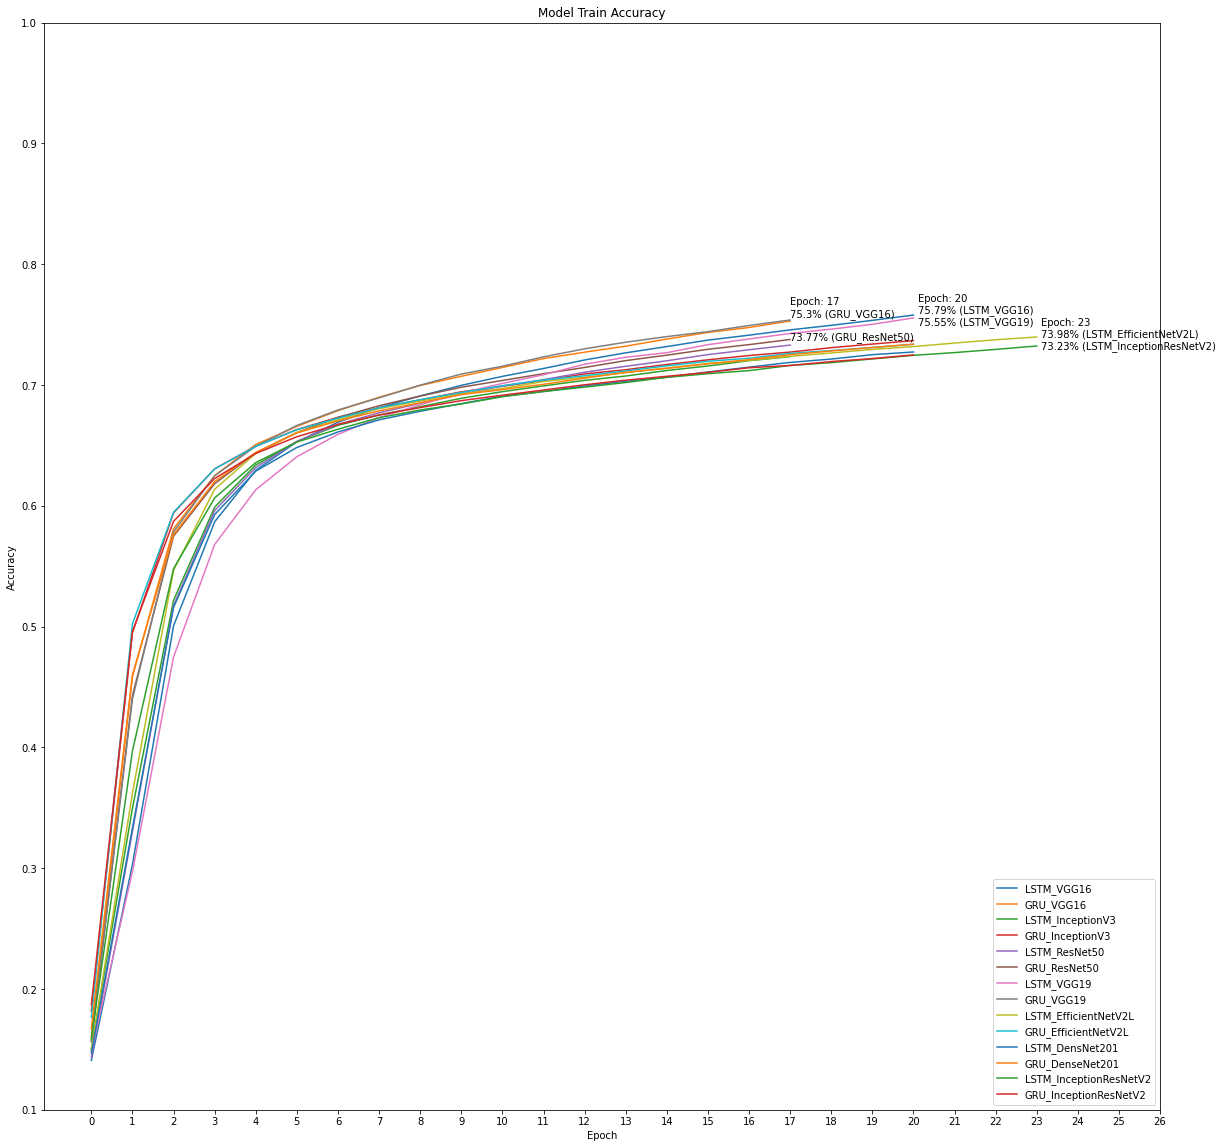

In [ ]:
plt.figure(figsize=(20,20))
# Plot accuracy history
plt.plot(LSTM_VGG16_history['accuracy'])
plt.plot(GRU_VGG16_history['accuracy'])
plt.plot(LSTM_InceptionV3_history['accuracy'])
plt.plot(GRU_InceptionV3_history['accuracy'])
plt.plot(LSTM_ResNet50_history['accuracy'])
plt.plot(GRU_ResNet50_history['accuracy'])
plt.plot(LSTM_VGG19_history['accuracy'])
plt.plot(GRU_VGG19_history['accuracy'])
plt.plot(LSTM_EfficientNetV2L_history['accuracy'])
plt.plot(GRU_EfficientNetV2L_history['accuracy'])
plt.plot(LSTM_DenseNet201_history['accuracy'])
plt.plot(GRU_DenseNet201_history['accuracy'])
plt.plot(LSTM_InceptionResNetV2_history['accuracy'])
plt.plot(GRU_InceptionResNetV2_history['accuracy'])
# Plot outstanding values
y_max = max(LSTM_VGG16_history['accuracy'])
x_max = LSTM_VGG16_history['accuracy'].index(y_max)
plt.annotate("Epoch: 20\n" + str(round(y_max*100,2)) + "% (LSTM_VGG16)", (x_max,y_max), xytext = (x_max + 0.1,0.76))

y_max = max(GRU_VGG16_history['accuracy'])
x_max = GRU_VGG16_history['accuracy'].index(y_max)
plt.annotate("Epoch: 17\n" + str(round(y_max*100,2)) + "% (GRU_VGG16)", (x_max,y_max), xytext = (x_max,0.757))

y_max = max(GRU_ResNet50_history['accuracy'])
x_max = GRU_ResNet50_history['accuracy'].index(y_max)
plt.annotate(str(round(y_max*100,2)) + "% (GRU_ResNet50)", (x_max,y_max), xytext = (x_max,y_max))

y_max = max(LSTM_VGG19_history['accuracy'])
x_max = LSTM_VGG19_history['accuracy'].index(y_max)
plt.annotate(str(round(y_max*100,2)) + "% (LSTM_VGG19)", (x_max,y_max), xytext = (x_max + 0.1,0.75))

y_max = max(LSTM_EfficientNetV2L_history['accuracy'])
x_max = LSTM_EfficientNetV2L_history['accuracy'].index(y_max)
plt.annotate("Epoch: 23\n" + str(round(y_max*100,2)) + "% (LSTM_EfficientNetV2L)", (x_max,y_max), xytext = (x_max + 0.1, y_max))

y_max = max(LSTM_InceptionResNetV2_history['accuracy'])
x_max = LSTM_InceptionResNetV2_history['accuracy'].index(y_max)
plt.annotate(str(round(y_max*100,2)) + "% (LSTM_InceptionResNetV2)", (x_max,y_max), xytext = (x_max + 0.1, y_max - 0.002))

plt.title('Model Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(list_xticks)
plt.yticks(list_yticks)
plt.legend(list_legends, loc='lower right')
plt.show()

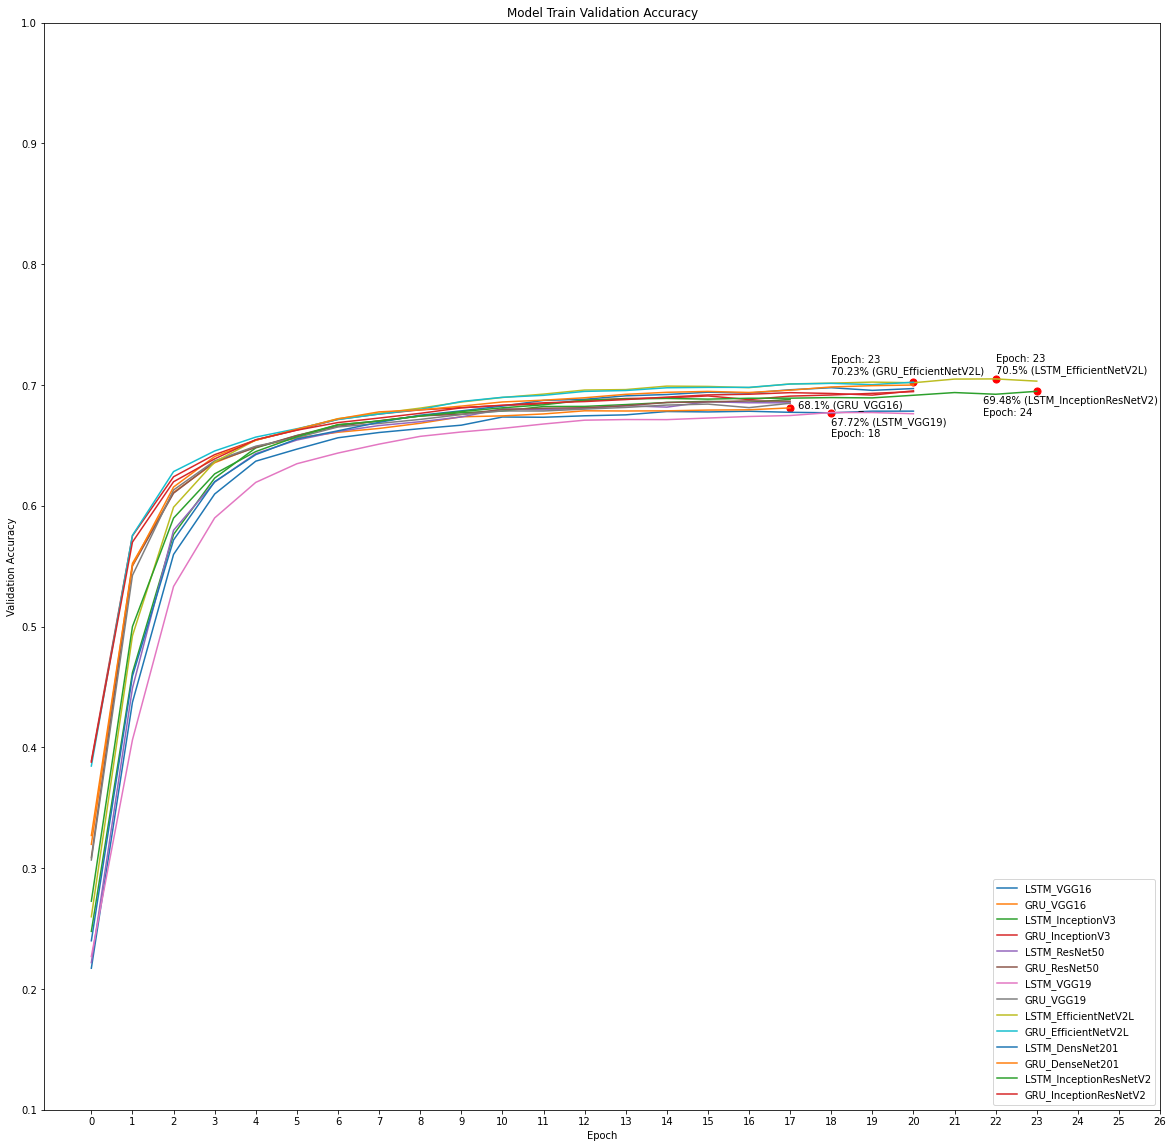

In [ ]:
plt.figure(figsize=(20,20))
# Plot val accuracy history
plt.plot(LSTM_VGG16_history['val_accuracy'])
plt.plot(GRU_VGG16_history['val_accuracy'])
plt.plot(LSTM_InceptionV3_history['val_accuracy'])
plt.plot(GRU_InceptionV3_history['val_accuracy'])
plt.plot(LSTM_ResNet50_history['val_accuracy'])
plt.plot(GRU_ResNet50_history['val_accuracy'])
plt.plot(LSTM_VGG19_history['val_accuracy'])
plt.plot(GRU_VGG19_history['val_accuracy'])
plt.plot(LSTM_EfficientNetV2L_history['val_accuracy'])
plt.plot(GRU_EfficientNetV2L_history['val_accuracy'])
plt.plot(LSTM_DenseNet201_history['val_accuracy'])
plt.plot(GRU_DenseNet201_history['val_accuracy'])
plt.plot(LSTM_InceptionResNetV2_history['val_accuracy'])
plt.plot(GRU_InceptionResNetV2_history['val_accuracy'])
# Plot outstanding values
y_max = max(LSTM_VGG19_history['val_accuracy'])
x_max = LSTM_VGG19_history['val_accuracy'].index(y_max)
plt.scatter(x_max, y_max, s=50, c='red')
plt.annotate(str(round(y_max*100,2)) + "% (LSTM_VGG19)\nEpoch: 18", (x_max,y_max), xytext = (x_max,y_max - 0.02))

y_max = max(GRU_VGG16_history['val_accuracy'])
x_max = GRU_VGG16_history['val_accuracy'].index(y_max)
plt.scatter(x_max, y_max, s=50, c='red')
plt.annotate(str(round(y_max*100,2)) + "% (GRU_VGG16)", (x_max,y_max), xytext = (x_max + 0.2,y_max))

y_max = max(LSTM_EfficientNetV2L_history['val_accuracy'])
x_max = LSTM_EfficientNetV2L_history['val_accuracy'].index(y_max)
plt.scatter(x_max, y_max, s=50, c='red')
plt.annotate("Epoch: 23\n" + str(round(y_max*100,2)) + "% (LSTM_EfficientNetV2L)", (x_max,y_max), xytext = (x_max,y_max + 0.005))

y_max = max(GRU_EfficientNetV2L_history['val_accuracy'])
x_max = GRU_EfficientNetV2L_history['val_accuracy'].index(y_max)
plt.scatter(x_max, y_max, s=50, c='red')
plt.annotate("Epoch: 23\n" + str(round(y_max*100,2)) + "% (GRU_EfficientNetV2L)", (x_max,y_max), xytext = (x_max - 2,y_max + 0.007))

y_max = max(LSTM_InceptionResNetV2_history['val_accuracy'])
x_max = LSTM_InceptionResNetV2_history['val_accuracy'].index(y_max)
plt.scatter(x_max, y_max, s=50, c='red')
plt.annotate(str(round(y_max*100,2)) + "% (LSTM_InceptionResNetV2)\nEpoch: 24", (x_max,y_max), xytext = (x_max - 1.3,y_max - 0.02))

plt.title('Model Train Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.xticks(list_xticks)
plt.yticks(list_yticks)
plt.legend(list_legends, loc='lower right')
plt.show()

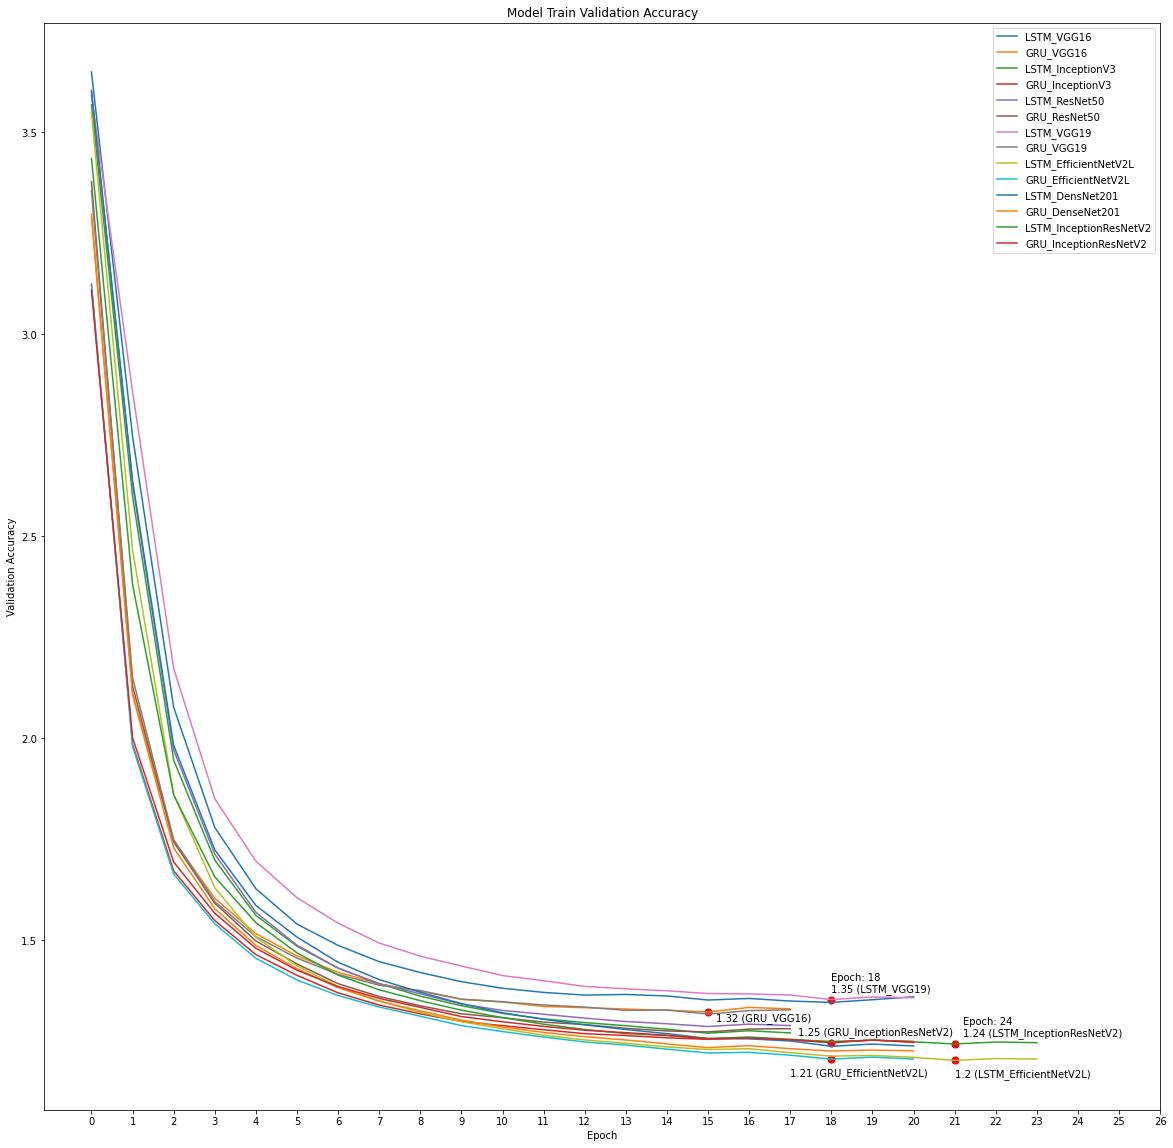

In [ ]:
plt.figure(figsize=(20,20))
# Plot val accuracy history
plt.plot(LSTM_VGG16_history['val_loss'])
plt.plot(GRU_VGG16_history['val_loss'])
plt.plot(LSTM_InceptionV3_history['val_loss'])
plt.plot(GRU_InceptionV3_history['val_loss'])
plt.plot(LSTM_ResNet50_history['val_loss'])
plt.plot(GRU_ResNet50_history['val_loss'])
plt.plot(LSTM_VGG19_history['val_loss'])
plt.plot(GRU_VGG19_history['val_loss'])
plt.plot(LSTM_EfficientNetV2L_history['val_loss'])
plt.plot(GRU_EfficientNetV2L_history['val_loss'])
plt.plot(LSTM_DenseNet201_history['val_loss'])
plt.plot(GRU_DenseNet201_history['val_loss'])
plt.plot(LSTM_InceptionResNetV2_history['val_loss'])
plt.plot(GRU_InceptionResNetV2_history['val_loss'])
# Plot outstanding values
y_min = min(LSTM_VGG19_history['val_loss'])
x_min = LSTM_VGG19_history['val_loss'].index(y_min)
plt.scatter(x_min, y_min, s=50, c='red')
plt.annotate("Epoch: 18\n" + str(round(y_min,2)) + " (LSTM_VGG19)", (x_min,y_min), xytext = (x_min,y_min + 0.02))

y_min = min(GRU_VGG16_history['val_loss'])
x_min = GRU_VGG16_history['val_loss'].index(y_min)
plt.scatter(x_min, y_min, s=50, c='red')
plt.annotate(str(round(y_min,2)) + " (GRU_VGG16)", (x_min,y_min), xytext = (x_min + 0.2,y_min - 0.02))

y_min = min(LSTM_EfficientNetV2L_history['val_loss'])
x_min = LSTM_EfficientNetV2L_history['val_loss'].index(y_min)
plt.scatter(x_min, y_min, s=50, c='red')
plt.annotate(str(round(y_min,2)) + " (LSTM_EfficientNetV2L)", (x_min,y_min), xytext = (x_min,y_min - 0.04))

y_min = min(GRU_EfficientNetV2L_history['val_loss'])
x_min = GRU_EfficientNetV2L_history['val_loss'].index(y_min)
plt.scatter(x_min, y_min, s=50, c='red')
plt.annotate(str(round(y_min,2)) + " (GRU_EfficientNetV2L)", (x_min,y_min), xytext = (x_min - 1,y_min - 0.04))

y_min = min(LSTM_InceptionResNetV2_history['val_loss'])
x_min = LSTM_InceptionResNetV2_history['val_loss'].index(y_min)
plt.scatter(x_min, y_min, s=50, c='red')
plt.annotate("Epoch: 24\n" + str(round(y_min,2)) + " (LSTM_InceptionResNetV2)", (x_min,y_min), xytext = (x_min + 0.2,y_min + 0.02))

y_min = min(GRU_InceptionResNetV2_history['val_loss'])
x_min = GRU_InceptionResNetV2_history['val_loss'].index(y_min)
plt.scatter(x_min, y_min, s=50, c='red')
plt.annotate(str(round(y_min,2)) + " (GRU_InceptionResNetV2)", (x_min,y_min), xytext = (x_min - 0.8,y_min + 0.02))

plt.title('Model Train Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.xticks(list_xticks)
#plt.yticks(list_yticks)
plt.legend(list_legends, loc='upper right')
plt.show()

In [ ]:
# list model
list_models_VGG16 = [LSTM_VGG16_model, GRU_VGG16_model]
list_models_ResNet50 = [LSTM_ResNet50_model, GRU_ResNet50_model]
list_models_InceptionV3 = [LSTM_InceptionV3_model, GRU_InceptionV3_model]
list_models_VGG19 = [LSTM_VGG19_model, GRU_VGG19_model]
list_models_EfficientNetV2L = [LSTM_EfficientNetV2L_model, GRU_EfficientNetV2L_model]
list_models_InceptionResNetV2 = [LSTM_InceptionResNetV2_model, GRU_InceptionResNetV2_model]
list_models_DenseNet201 = [LSTM_DenseNet201_model, GRU_DenseNet201_model]

# list model name
list_models_name_VGG16 = ["LSTM_VGG16_model", "GRU_VGG16_model"]
list_models_name_ResNet50 = ["LSTM_ResNet50_model", "GRU_ResNet50_model"]
list_models_name_InceptionV3 = ["LSTM_InceptionV3_model", "GRU_InceptionV3_model"]
list_models_name_VGG19 = ["LSTM_VGG19_model", "GRU_VGG19_model"]
list_models_name_EfficientNetV2L = ["LSTM_EfficientNetV2L_model", "GRU_EfficientNetV2L_model"]
list_models_name_DenseNet201 = ["LSTM_DenseNet201_model", "GRU_DenseNet201_model"]
list_models_name_InceptionResNetV2 = ["LSTM_InceptionResNetV2_model", "GRU_InceptionResNetV2_model"]

In [ ]:
# VGG16
index = 0
actual, predicted = list(), list()
for model in list_models_VGG16:
  print("-------------Evaluating model {}-------------".format(list_models_name_VGG16[index]))
  for key in tqdm(test):
      # get actual caption
      captions = mapping[key]
      # predict the caption for image
      y_pred = predict_caption(model, features_vietnam_VGG16[key], tokenizer, max_length)
      # split into words
      actual_captions = [caption.split() for caption in captions]
      y_pred = y_pred.split()
      # append to the list
      actual.append(actual_captions)
      predicted.append(y_pred)
  print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
  print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
  print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
  print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
  index += 1

-------------Evaluating model LSTM_VGG16_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.726519
BLEU-2: 0.581915
BLEU-3: 0.481722
BLEU-4: 0.391683
-------------Evaluating model GRU_VGG16_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.718966
BLEU-2: 0.571356
BLEU-3: 0.471383
BLEU-4: 0.384247


In [ ]:
# InceptionV3
index = 0
actual, predicted = list(), list()
for model in list_models_InceptionV3:
  print("-------------Evaluating model {}-------------".format(list_models_name_InceptionV3[index]))
  for key in tqdm(test):
      # get actual caption
      captions = mapping[key]
      # predict the caption for image
      y_pred = predict_caption(model, features_vietnam_InceptionV3[key], tokenizer, max_length)
      # split into words
      actual_captions = [caption.split() for caption in captions]
      y_pred = y_pred.split()
      # append to the list
      actual.append(actual_captions)
      predicted.append(y_pred)
  print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
  print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
  print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
  print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
  index += 1

-------------Evaluating model LSTM_InceptionV3_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.736760
BLEU-2: 0.592004
BLEU-3: 0.496092
BLEU-4: 0.414692
-------------Evaluating model GRU_InceptionV3_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.736632
BLEU-2: 0.592501
BLEU-3: 0.497284
BLEU-4: 0.416144


In [ ]:
# ResNet50
index = 0
actual, predicted = list(), list()
for model in list_models_ResNet50:
  print("-------------Evaluating model {}-------------".format(list_models_name_ResNet50[index]))
  for key in tqdm(test):
      # get actual caption
      captions = mapping[key]
      # predict the caption for image
      y_pred = predict_caption(model, features_vietnam_ResNet50[key], tokenizer, max_length)
      # split into words
      actual_captions = [caption.split() for caption in captions]
      y_pred = y_pred.split()
      # append to the list
      actual.append(actual_captions)
      predicted.append(y_pred)
  print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
  print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
  print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
  print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
  index += 1

-------------Evaluating model LSTM_ResNet50_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.752541
BLEU-2: 0.617096
BLEU-3: 0.527211
BLEU-4: 0.448514
-------------Evaluating model GRU_ResNet50_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.751598
BLEU-2: 0.615317
BLEU-3: 0.524257
BLEU-4: 0.444315


In [ ]:
# VGG19
index = 0
actual, predicted = list(), list()
for model in list_models_VGG19:
  print("-------------Evaluating model {}-------------".format(list_models_name_VGG19[index]))
  for key in tqdm(test):
      # get actual caption
      captions = mapping[key]
      # predict the caption for image
      y_pred = predict_caption(model, features_vietnam_VGG19[key], tokenizer, max_length)
      # split into words
      actual_captions = [caption.split() for caption in captions]
      y_pred = y_pred.split()
      # append to the list
      actual.append(actual_captions)
      predicted.append(y_pred)
  print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
  print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
  print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
  print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
  index += 1

-------------Evaluating model LSTM_VGG19_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.728434
BLEU-2: 0.587256
BLEU-3: 0.491990
BLEU-4: 0.406363
-------------Evaluating model GRU_VGG19_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.727629
BLEU-2: 0.582077
BLEU-3: 0.484598
BLEU-4: 0.398973


In [ ]:
# EfficientNetV2L
index = 0
actual, predicted = list(), list()
for model in list_models_EfficientNetV2L:
  print("-------------Evaluating model {}-------------".format(list_models_name_EfficientNetV2L[index]))
  for key in tqdm(test):
      # get actual caption
      captions = mapping[key]
      # predict the caption for image
      y_pred = predict_caption(model, features_vietnam_EfficientNetV2L[key], tokenizer, max_length)
      # split into words
      actual_captions = [caption.split() for caption in captions]
      y_pred = y_pred.split()
      # append to the list
      actual.append(actual_captions)
      predicted.append(y_pred)
  print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
  print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
  print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
  print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
  index += 1

-------------Evaluating model LSTM_EfficientNetV2L_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.785714
BLEU-2: 0.655286
BLEU-3: 0.564918
BLEU-4: 0.486674
-------------Evaluating model GRU_EfficientNetV2L_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.776107
BLEU-2: 0.642451
BLEU-3: 0.551690
BLEU-4: 0.473500


In [ ]:
# DenseNet201
index = 0
actual, predicted = list(), list()
for model in list_models_DenseNet201:
  print("-------------Evaluating model {}-------------".format(list_models_name_DenseNet201[index]))
  for key in tqdm(test):
      # get actual caption
      captions = mapping[key]
      # predict the caption for image
      y_pred = predict_caption(model, features_vietnam_DenseNet201[key], tokenizer, max_length)
      # split into words
      actual_captions = [caption.split() for caption in captions]
      y_pred = y_pred.split()
      # append to the list
      actual.append(actual_captions)
      predicted.append(y_pred)
  print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
  print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
  print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
  print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
  index += 1

-------------Evaluating model LSTM_DenseNet201_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.740209
BLEU-2: 0.600814
BLEU-3: 0.505997
BLEU-4: 0.424992
-------------Evaluating model GRU_DenseNet201_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.744950
BLEU-2: 0.605823
BLEU-3: 0.512072
BLEU-4: 0.432211


In [ ]:
# InceptionResNetV2
index = 0
actual, predicted = list(), list()
for model in list_models_InceptionResNetV2:
  print("-------------Evaluating model {}-------------".format(list_models_name_InceptionResNetV2[index]))
  for key in tqdm(test):
      # get actual caption
      captions = mapping[key]
      # predict the caption for image
      y_pred = predict_caption(model, features_vietnam_InceptionResNetV2[key], tokenizer, max_length)
      # split into words
      actual_captions = [caption.split() for caption in captions]
      y_pred = y_pred.split()
      # append to the list
      actual.append(actual_captions)
      predicted.append(y_pred)
  print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
  print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
  print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
  print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
  index += 1

-------------Evaluating model LSTM_InceptionResNetV2_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.733062
BLEU-2: 0.585530
BLEU-3: 0.488150
BLEU-4: 0.406493
-------------Evaluating model GRU_InceptionResNetV2_model-------------


  0%|          | 0/385 [00:00<?, ?it/s]

BLEU-1: 0.740972
BLEU-2: 0.595404
BLEU-3: 0.498652
BLEU-4: 0.417208


#### VISUALIZE RESULT

In [ ]:
def preprocess_output(text):
  wordlist = text.split()
  stopwords = ['startseq','endseq']
  text  = [word for word in wordlist if word.lower() not in stopwords]
  text = ' '.join(text)
  text = text.capitalize()
  return text

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Vietnam Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred_GRU_VGG16 = predict_caption(GRU_VGG16_model, features_vietnam_VGG16[image_id], tokenizer, max_length)
    y_pred_LSTM_VGG16 = predict_caption(LSTM_VGG16_model, features_vietnam_VGG16[image_id], tokenizer, max_length)
    y_pred_GRU_InceptionV3 = predict_caption(GRU_InceptionV3_model, features_vietnam_InceptionV3[image_id], tokenizer, max_length)
    y_pred_LSTM_InceptionV3 = predict_caption(LSTM_InceptionV3_model, features_vietnam_InceptionV3[image_id], tokenizer, max_length)
    y_pred_GRU_ResNet50 = predict_caption(GRU_ResNet50_model, features_vietnam_ResNet50[image_id], tokenizer, max_length)
    y_pred_LSTM_ResNet50 = predict_caption(LSTM_ResNet50_model, features_vietnam_ResNet50[image_id], tokenizer, max_length)
    y_pred_GRU_VGG19 = predict_caption(GRU_VGG19_model, features_vietnam_VGG19[image_id], tokenizer, max_length)
    y_pred_LSTM_VGG19 = predict_caption(LSTM_VGG19_model, features_vietnam_VGG19[image_id], tokenizer, max_length)
    y_pred_GRU_EfficientNetV2L = predict_caption(GRU_EfficientNetV2L_model, features_vietnam_EfficientNetV2L[image_id], tokenizer, max_length)
    y_pred_LSTM_EfficientNetV2L = predict_caption(LSTM_EfficientNetV2L_model, features_vietnam_EfficientNetV2L[image_id], tokenizer, max_length)
    y_pred_GRU_DenseNet201 = predict_caption(GRU_DenseNet201_model, features_vietnam_DenseNet201[image_id], tokenizer, max_length)
    y_pred_LSTM_DenseNet201 = predict_caption(LSTM_DenseNet201_model, features_vietnam_DenseNet201[image_id], tokenizer, max_length)
    y_pred_GRU_InceptionResNetV2 = predict_caption(GRU_InceptionResNetV2_model, features_vietnam_InceptionResNetV2[image_id], tokenizer, max_length)
    y_pred_LSTM_InceptionResNetV2 = predict_caption(LSTM_InceptionResNetV2_model, features_vietnam_InceptionResNetV2[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print("GRU + VGG16: \n", preprocess_output(y_pred_GRU_VGG16))
    print("LSTM + VGG16: \n", preprocess_output(y_pred_LSTM_VGG16))
    print("GRU + InceptionV3: \n", preprocess_output(y_pred_GRU_InceptionV3))
    print("LSTM + InceptionV3: \n", preprocess_output(y_pred_LSTM_InceptionV3))
    print("GRU + ResNet50: \n", preprocess_output(y_pred_GRU_ResNet50))
    print("LSTM + ResNet50: \n", preprocess_output(y_pred_LSTM_ResNet50))
    print("GRU + VGG19: \n", preprocess_output(y_pred_GRU_VGG19))
    print("LSTM + VGG19: \n", preprocess_output(y_pred_LSTM_VGG19))
    print("GRU + EfficientNetV2L: \n", preprocess_output(y_pred_GRU_EfficientNetV2L))
    print("LSTM + EfficientNetV2L: \n", preprocess_output(y_pred_LSTM_EfficientNetV2L))
    print("GRU + DenseNet201: \n", preprocess_output(y_pred_GRU_DenseNet201))
    print("LSTM + DenseNet201: \n", preprocess_output(y_pred_LSTM_DenseNet201))
    print("GRU + InceptionResNetV2: \n", preprocess_output(y_pred_GRU_InceptionResNetV2))
    print("LSTM + InceptionResNetV2: \n", preprocess_output(y_pred_LSTM_InceptionResNetV2))
    plt.imshow(image)

---------------------Actual---------------------
startseq những đứa trẻ đang cầm vợt tennis và đứng trên sân endseq
startseq cô bé áo xanh đang chuẩn bị đánh quả bóng tennis endseq
startseq những đứa trẻ đang chờ tới lượt để tập đánh bóng trên sân tennis endseq
startseq những đứa trẻ đang chuẩn bị đánh quả bóng tennis endseq
startseq những đứa trẻ đang xếp thành hàng trên sân tennis endseq
--------------------Predicted--------------------
GRU + VGG16: 
 một số người đang chơi tennis trên sân
LSTM + VGG16: 
 một nữ vận động viên tennis đang chuẩn bị đánh bóng
GRU + InceptionV3: 
 một người đàn ông đang vung vợt để đánh quả bóng tennis
LSTM + InceptionV3: 
 một người đàn ông đang chuẩn bị đánh quả bóng tennis
GRU + ResNet50: 
 hai người đàn ông đang chơi tennis trên sân
LSTM + ResNet50: 
 một nam vận động viên tennis đang nhảy lên để đánh bóng
GRU + VGG19: 
 hai người đàn ông đang chơi tennis trên sân
LSTM + VGG19: 
 hai người đàn ông đang chơi tennis trên sân
GRU + EfficientNetV2L: 
 mộ

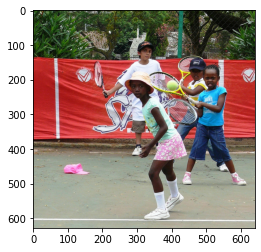

In [ ]:
generate_caption("100034.jpg")

---------------------Actual---------------------
startseq các cầu thủ bóng chày đang thi đấu trên sân endseq
startseq cầu thủ đánh bóng đang giơ gậy lên để chuẩn bị đánh bóng endseq
startseq khán giả đang theo dõi diễn biến của trận thi đấu bóng chày nam endseq
startseq cầu thủ bắt bóng cầu thủ đánh bóng và trọng tài đang tập trung gôn endseq
startseq những người đàn ông đang chơi bóng chày trên sân endseq
--------------------Predicted--------------------
GRU + VGG16: 
 cầu thủ bóng chày đang cầm gậy thi đấu trên sân
LSTM + VGG16: 
 cầu thủ đánh bóng đang vung gậy để đánh bóng
GRU + InceptionV3: 
 cầu thủ đánh bóng đang vung gậy để đánh bóng
LSTM + InceptionV3: 
 cầu thủ bắt bóng đang chuẩn bị bắt quả bóng
GRU + ResNet50: 
 cầu thủ bóng chày đang cầm gậy thi đấu trên sân
LSTM + ResNet50: 
 cầu thủ đánh bóng đang vung gậy để đánh bóng
GRU + VGG19: 
 cầu thủ bắt bóng và trọng tài đang theo dõi cú đánh bóng của cầu thủ đánh bóng
LSTM + VGG19: 
 cầu thủ đánh bóng đang giơ gậy lên cao trên 

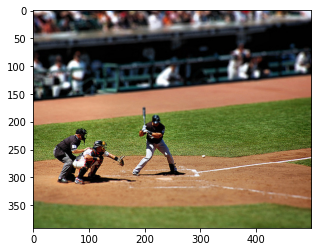

In [ ]:
generate_caption("11107.jpg")

---------------------Actual---------------------
startseq một cậu bé đang nhắm mắt để né quả bóng endseq
startseq một cậu bé đang đưa hai tay ra trước trước khung thành endseq
startseq một cậu bé đang nhắm mắt và thả quả bóng rơi xuống sân endseq
startseq một cậu bé đang giơ hai tay lên cao để đỡ quả bóng trước khung thành endseq
startseq một cậu bé đang thả quả bóng rơi xuống sân cỏ endseq
--------------------Predicted--------------------
GRU + VGG16: 
 một cậu bé đang nhắm mắt để né quả bóng
LSTM + VGG16: 
 một cậu bé đang giơ hai tay lên cao trước khung thành
GRU + InceptionV3: 
 một cầu thủ bóng đá đang chuẩn bị sút bóng
LSTM + InceptionV3: 
 một cầu thủ bóng đá đang chuẩn bị sút bóng
GRU + ResNet50: 
 một cầu thủ bóng đá đang chuẩn bị sút bóng ngoài sân
LSTM + ResNet50: 
 một cậu bé đang nhắm mắt để né quả bóng
GRU + VGG19: 
 một cậu bé đang nhắm mắt để né quả bóng
LSTM + VGG19: 
 hai đứa trẻ đang chơi một trận bóng đá
GRU + EfficientNetV2L: 
 các cầu thủ bóng đá đang thi đấu trên

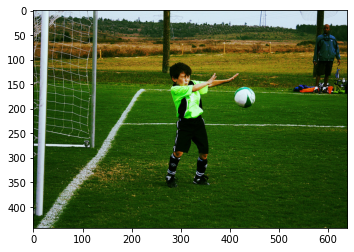

In [ ]:
generate_caption("126098.jpg")

### CREATE PIPELINE

In [ ]:
features_EfficientNetV2L = {}
def extract_features_EfficientNetV2L(img_path):
  image = load_img(img_path, target_size=(480, 480))
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = efficientnet_v2.preprocess_input(image)
  features = model_extract_EfficientNetV2L.predict(image, verbose = 0)
  return features

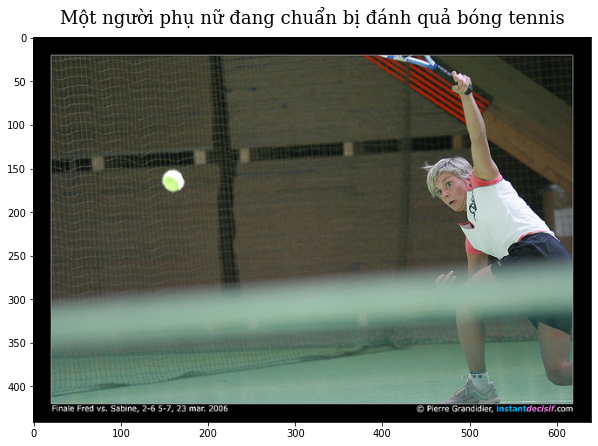

In [ ]:
from PIL import Image
def image_captioning(image_name):
  features = {}
  image_id = image_name.split('.')[0]
  img_path = os.path.join(TEST_DIR, image_name)
  image_show = Image.open(img_path)
  #extract feature
  features_EfficientNetV2L[image_id] = extract_features_EfficientNetV2L(img_path)
  #predict caption
  in_text = 'startseq'
  for i in range(max_length):
    sequence = tokenizer.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], max_length)
    yhat = LSTM_EfficientNetV2L_model.predict([features_EfficientNetV2L[image_id], sequence], verbose=0)
    yhat = np.argmax(yhat)
    word = idx_to_word(yhat, tokenizer)
    if word is None:
      break
    in_text += " " + word
    if word == 'endseq':
      break
  y_pred = in_text
  #plot caption
  plt.figure(figsize=(10, 10))
  plt.title(preprocess_output(y_pred), x = 0.5, y = 1.02, fontname="Serif", fontsize=18)
  plt.imshow(image_show)
  plt.savefig("/content/drive/MyDrive/Học tập/Xử lý ngôn ngữ tự nhiên cho KHDL/Image Caption Generator/Data/Result/" + image_name)
image_captioning("7.jpg")

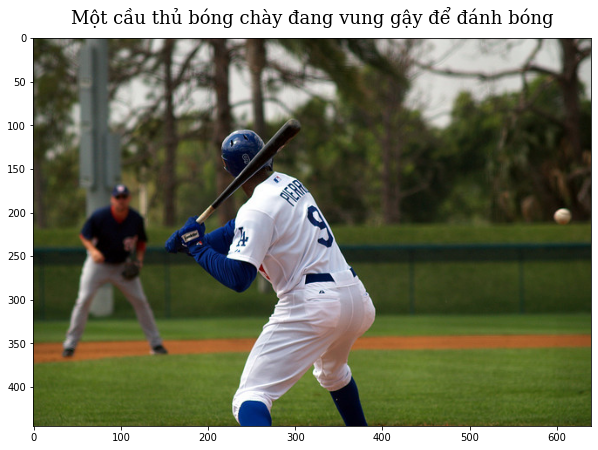

In [ ]:
image_captioning("8.jpg")

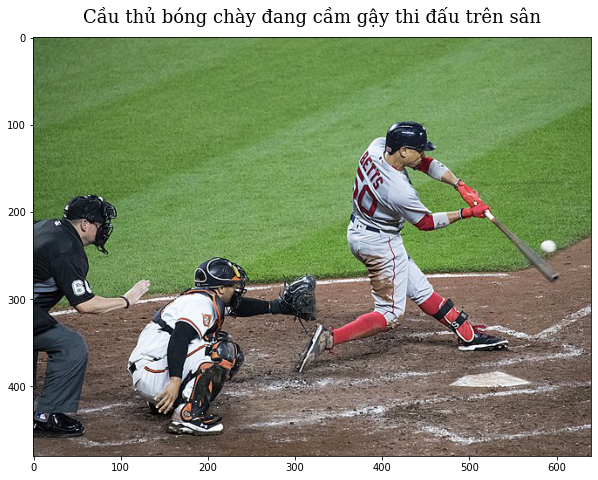

In [ ]:
image_captioning("1.jpg")

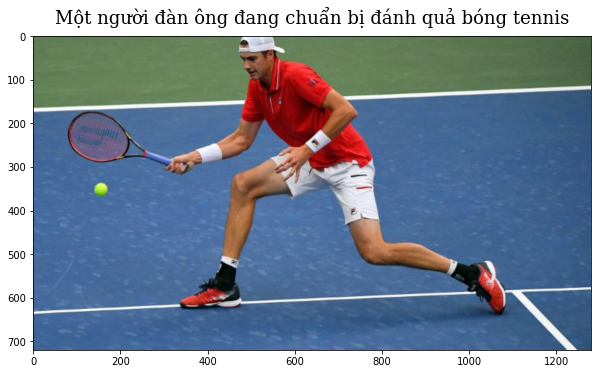

In [ ]:
image_captioning("2.jpg")

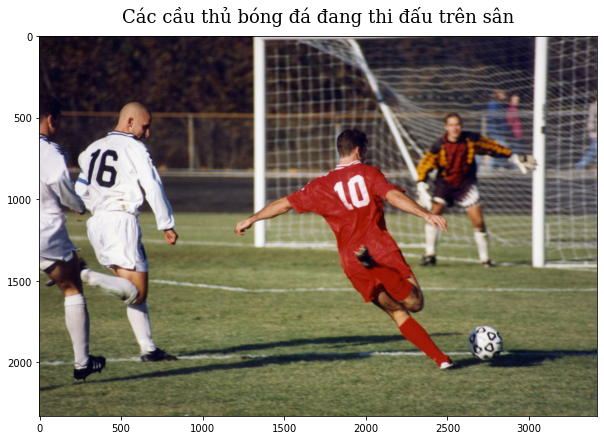

In [ ]:
image_captioning("3.jpg")

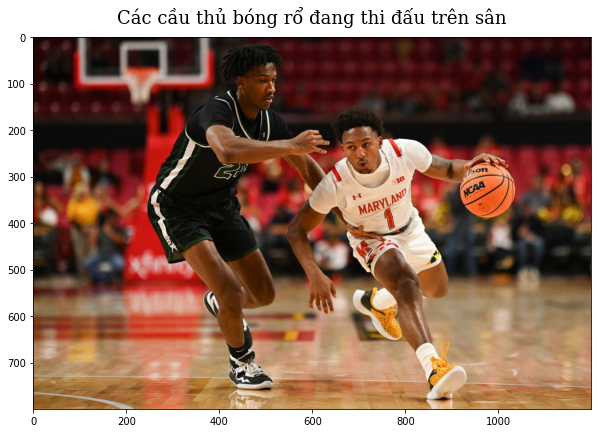

In [ ]:
image_captioning("4.jpg")

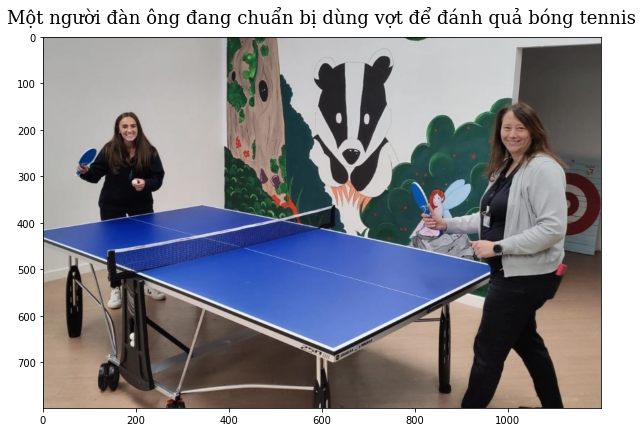

In [ ]:
image_captioning("5.jpg")

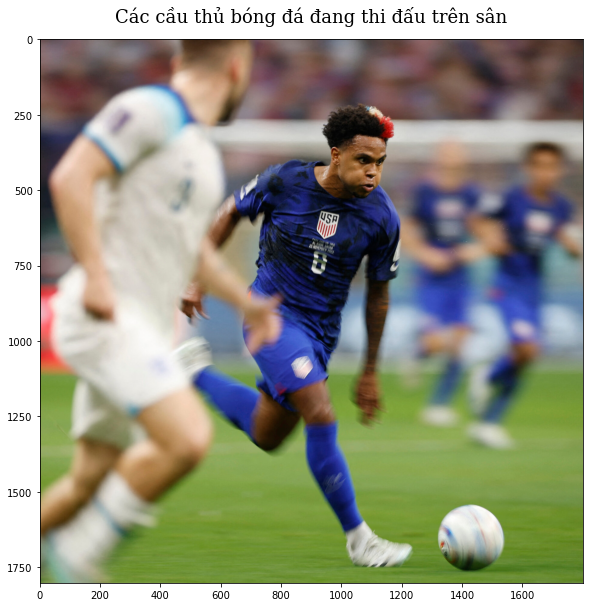

In [ ]:
image_captioning("6.jpg")

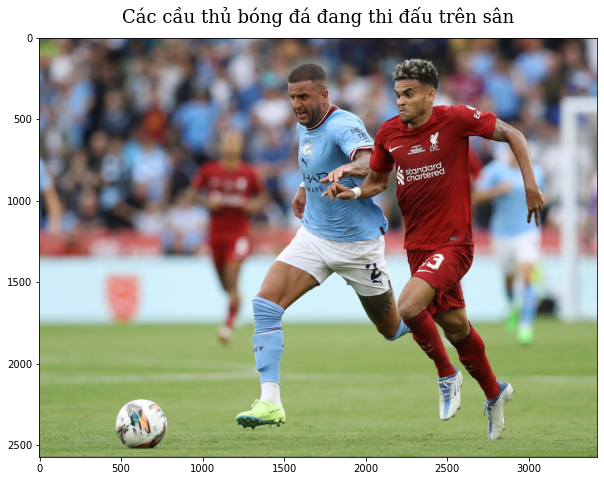

In [ ]:
image_captioning("9.jpg")

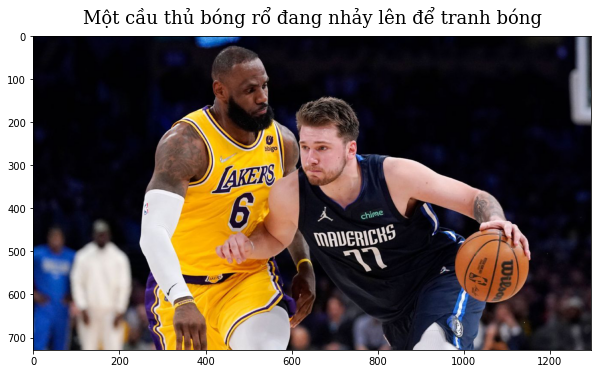

In [ ]:
image_captioning("10.jpg")

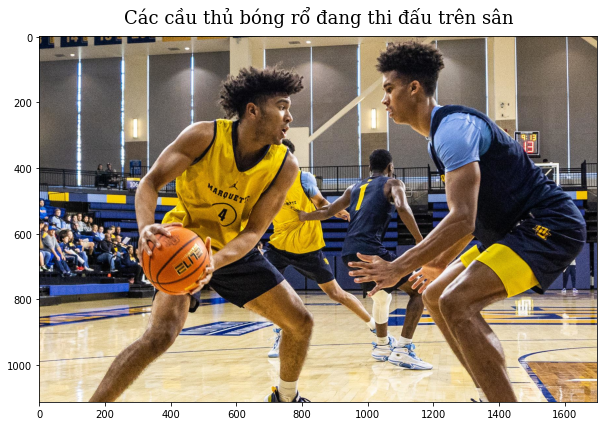

In [ ]:
image_captioning("11.jpg")

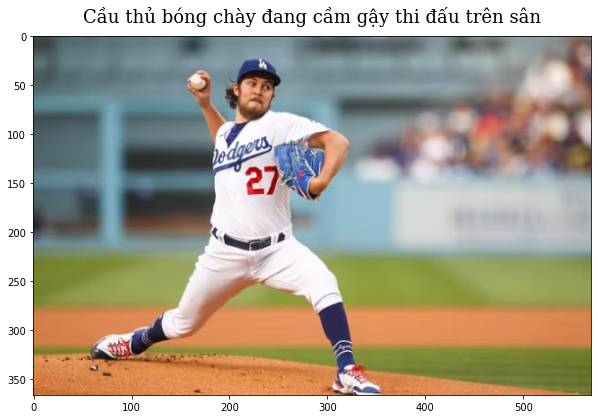

In [ ]:
image_captioning("12.jpg")

# **MACHINE TRANSLATION**

## IMPORT MODULES

In [ ]:
WORKING_DIR="/content/drive/MyDrive/DS301 NLP/"

In [ ]:
import pathlib
import random
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import LSTM
from tensorflow.python.ops.gen_dataset_ops import model_dataset_eager_fallback
from keras.models import Model
from keras.layers import Input, LSTM, Dense,Embedding
from nltk.translate.bleu_score import sentence_bleu

#import gg API
!pip install googletrans==4.0.0rc1
import googletrans
from googletrans import Translator


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 1.5 MB 60.7 MB/s 
     |████████████████████████████████| 42 kB 691 kB/s 
     |████████████████████████████████| 65 kB 4.3 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17414 sha256=b1264f16c8413945a9f2adce60313d4a08ee937013ae02086d6746c1ee5adce7
  Stored in directory: /root/.cache/pip/wheels/a9/25/af/715361fa79594524c89c75d293def652045f3fdce6ca398712
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.16.3
    Uninstalling httpcore-0.16.3:
      Successfully uninstalled httpcore-0.16.3
  Attempting

AttributeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## LOAD DATASET

In [ ]:
engcaption = pd.read_csv('/content/drive/MyDrive/WORK SPACE/TERM 5/DS301 NLP/DATA/flickr8k/captions.txt', sep=",", header=None)
engcaption.columns = ["image", "caption",]

In [ ]:
engcaption.sample(10)

image  \
27721  3421928157_69a325366f.jpg   
36188   424869823_7aec015d87.jpg   
27006  3393343330_b13df4d8ec.jpg   
20123  3101378069_f8caa14c0a.jpg   
8705    240696675_7d05193aa0.jpg   
2794   1509786421_f03158adfc.jpg   
20092  3099504809_565e17e49d.jpg   
24715  3295024992_887a95c700.jpg   
22453  3207654194_43d6bebd68.jpg   
23530  3249125548_700d874380.jpg   

                                                 caption  
27721  A group of men in an unner tube going over som...  
36188             Girls posing with rainbow in the sky .  
27006  A large man sits in a military accessories sto...  
20123     A man piloting a boat with goods in the back .  
8705   The dog is running along a path that has been ...  
2794   A little boy smiles and points while a man loo...  
20092      A man is climbing up a large rocky mountain .  
24715               Person skiing on slope near ski lift  
22453                      A dog running up a sandy hill  
23530  Two cyclists lead the pack in a race while wea...

In [ ]:
engcaption["unique"] = np.nan

In [ ]:
engcaption=engcaption.drop([0])

In [ ]:
a=1
for i in range(0,40454):
  if(engcaption.iloc[i]['image'] is engcaption.iloc[i+1]['image']):
    engcaption.iat[i,2]=a
    a=a+1
  else:
    engcaption.iat[i,2]=a
    a=1
engcaption.iat[40454,2]=5

In [ ]:
engcaption

image  \
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
5      1000268201_693b08cb0e.jpg   
...                          ...   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   
40455   997722733_0cb5439472.jpg   

                                                 caption  unique  
1      A child in a pink dress is climbing up a set o...     1.0  
2                  A girl going into a wooden building .     2.0  
3       A little girl climbing into a wooden playhouse .     3.0  
4      A little girl climbing the stairs to her playh...     4.0  
5      A little girl in a pink dress going into a woo...     5.0  
...                                                  ...     ...  
40451           A man in a pink shirt climbs a rock face     1.0  
40452           A man is rock climbing high in the air .     2.0  
40453  A person in a red shirt climbing up a rock fac...     3.0  
40454                    A rock climber in a red shirt .     4.0  
40455  A rock climber practices on a rock climbing wa...     5.0  

[40455 rows x 3 columns]

In [ ]:
vietcaption = pd.read_csv('/content/drive/MyDrive/WORK SPACE/TERM 5/DS301 NLP/DATA/flickr8k/captions_vi.txt', sep="\t", header=None)
vietcaption.columns = ["image", "caption",]

In [ ]:
vietcaption.head(10)

image  \
0  1332722096_1e3de8ae70.jpg   
1  1332722096_1e3de8ae70.jpg   
2  1332722096_1e3de8ae70.jpg   
3  1332722096_1e3de8ae70.jpg   
4  1332722096_1e3de8ae70.jpg   
5  1989145280_3b54452188.jpg   
6  1989145280_3b54452188.jpg   
7  1989145280_3b54452188.jpg   
8  1989145280_3b54452188.jpg   
9  1989145280_3b54452188.jpg   

                                             caption  
0  Ba người phụ nữ đứng trên một con phố trong th...  
1                    Ba người phụ nữ đi bộ xuống phố  
2   Hai cô gái và một người phụ nữ đi bộ trên vỉa hè  
3   Hai cô gái đi ủng màu xanh lá cây tươi sáng v...  
4   Hai cô gái trẻ đi ủng màu xanh lá cây đang đi...  
5  Một cô gái tóc vàng với chiếc kính râm trên đầ...  
6                      Một người phụ nữ đeo kính râm  
7   Một người phụ nữ đeo kính râm trên đầu nhìn x...  
8   người phụ nữ mặc áo đen và đeo kính trên đầu ...  
9   Người phụ nữ đeo kính râm đen nhìn xuống thứ ...

In [ ]:
vietcaption["unique"] = np.nan

In [ ]:
a=1
for i in range(0,39999):
  if(vietcaption.iloc[i]['image'] is vietcaption.iloc[i+1]['image']):
    vietcaption.iat[i,2]=a
    a=a+1
  else:
    vietcaption.iat[i,2]=a
    a=1
vietcaption.iat[39999,2]=5

In [ ]:
vietcaption

image  \
0      1332722096_1e3de8ae70.jpg   
1      1332722096_1e3de8ae70.jpg   
2      1332722096_1e3de8ae70.jpg   
3      1332722096_1e3de8ae70.jpg   
4      1332722096_1e3de8ae70.jpg   
...                          ...   
39995   997338199_7343367d7f.jpg   
39996   997338199_7343367d7f.jpg   
39997   997338199_7343367d7f.jpg   
39998   997338199_7343367d7f.jpg   
39999   997338199_7343367d7f.jpg   

                                                 caption  unique  
0      Ba người phụ nữ đứng trên một con phố trong th...     1.0  
1                        Ba người phụ nữ đi bộ xuống phố     2.0  
2       Hai cô gái và một người phụ nữ đi bộ trên vỉa hè     3.0  
3       Hai cô gái đi ủng màu xanh lá cây tươi sáng v...     4.0  
4       Hai cô gái trẻ đi ủng màu xanh lá cây đang đi...     5.0  
...                                                  ...     ...  
39995           Một người đứng gần những bức tường vàng.     1.0  
39996       một phụ nữ đằng sau bức tường cuộn đang viết     2.0  
39997  Một người phụ nữ đứng gần bức tường trang trí ...     3.0  
39998            Các bức tường được phủ vàng và hoa văn.     4.0  
39999  Người phụ nữ viết trên một tấm đệm trong phòng...     5.0  

[40000 rows x 3 columns]

In [ ]:
dff = pd.merge(engcaption, vietcaption, on=['image','unique'], how="left")
df_new=dff[dff['caption_y'].notna()]
df_new

image  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40445   997338199_7343367d7f.jpg   
40446   997338199_7343367d7f.jpg   
40447   997338199_7343367d7f.jpg   
40448   997338199_7343367d7f.jpg   
40449   997338199_7343367d7f.jpg   

                                               caption_x  unique  \
0      A child in a pink dress is climbing up a set o...     1.0   
1                  A girl going into a wooden building .     2.0   
2       A little girl climbing into a wooden playhouse .     3.0   
3      A little girl climbing the stairs to her playh...     4.0   
4      A little girl in a pink dress going into a woo...     5.0   
...                                                  ...     ...   
40445                A person stands near golden walls .     1.0   
40446          a woman behind a scrolled wall is writing     2.0   
40447    A woman standing near a decorated wall writes .     3.0   
40448       The walls are covered in gold and patterns .     4.0   
40449  Woman writing on a pad in room with gold , dec...     5.0   

                                               caption_y  
0      Một đứa trẻ mặc váy hồng đang trèo lên một bộ ...  
1                 Một cô gái đi vào một tòa nhà bằng gỗ.  
2                   Một cô bé trèo vào nhà chơi bằng gỗ.  
3      Một cô bé leo lên cầu thang đến nhà chơi của m...  
4                Một cô bé mặc váy hồng đi vào cabin gỗ.  
...                                                  ...  
40445           Một người đứng gần những bức tường vàng.  
40446       một phụ nữ đằng sau bức tường cuộn đang viết  
40447  Một người phụ nữ đứng gần bức tường trang trí ...  
40448            Các bức tường được phủ vàng và hoa văn.  
40449  Người phụ nữ viết trên một tấm đệm trong phòng...  

[40000 rows x 4 columns]

In [ ]:
df_save=pd.DataFrame({'vie': df_new['caption_y'],
                   'english':df_new['caption_x'] })

In [ ]:
df_save

vie  \
0      Một đứa trẻ mặc váy hồng đang trèo lên một bộ ...   
1                 Một cô gái đi vào một tòa nhà bằng gỗ.   
2                   Một cô bé trèo vào nhà chơi bằng gỗ.   
3      Một cô bé leo lên cầu thang đến nhà chơi của m...   
4                Một cô bé mặc váy hồng đi vào cabin gỗ.   
...                                                  ...   
40445           Một người đứng gần những bức tường vàng.   
40446       một phụ nữ đằng sau bức tường cuộn đang viết   
40447  Một người phụ nữ đứng gần bức tường trang trí ...   
40448            Các bức tường được phủ vàng và hoa văn.   
40449  Người phụ nữ viết trên một tấm đệm trong phòng...   

                                                 english  
0      [start] A child in a pink dress is climbing up...  
1      [start] A girl going into a wooden building . ...  
2      [start] A little girl climbing into a wooden p...  
3      [start] A little girl climbing the stairs to h...  
4      [start] A little girl in a pink dress going in...  
...                                                  ...  
40445  [start] A person stands near golden walls . [end]  
40446  [start] a woman behind a scrolled wall is writ...  
40447  [start] A woman standing near a decorated wall...  
40448  [start] The walls are covered in gold and patt...  
40449  [start] Woman writing on a pad in room with go...  

[40000 rows x 2 columns]

In [ ]:
df_save.to_csv("/content/drive/MyDrive/WORK SPACE/TERM 5/DS301 NLP/DS310 - ĐỒ ÁN NHÓM/CODE/MACHINE TRANSLATION MODEL/DATA/data.csv")

In [ ]:
df_new['caption_x']=df_new['caption_x'].astype(str) + " [end]"
df_new['caption_x']="[start] " + df_new['caption_x'].astype(str)

vie = df_new['caption_y'].values.tolist()
english = df_new['caption_x'].values.tolist()

<ipython-input-16-a0c9d478af7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['caption_x']=df_new['caption_x'].astype(str) + " [end]"
<ipython-input-16-a0c9d478af7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['caption_x']="[start] " + df_new['caption_x'].astype(str)


In [ ]:
text_pairs = list(zip(vie, english))

## PARSING AND MERGE

In [ ]:
for _ in range(5):
    print(random.choice(text_pairs))

('Ba chàng trai trẻ chơi cầu lông với một hàng rào ở phía sau.', '[start] Three young boys playing badminton , with a fence in the background . [end]')
('Một cậu bé mặc áo xanh đi qua một số tảng đá.', '[start] A boy wearing blue walks across some rocks . [end]')
('Bốn người đàn ông trông giống nhau ngồi trên ghế trong khi hai người họ uống từ ly.', '[start] Four men who look alike sit in chairs , while two of them drink from glasses . [end]')
('Một con chó màu nâu và trắng đứng bên ngoài trong khi tuyết.', '[start] A brown and white dog stands outside while it snows . [end]')
('Hai con ngựa đang nhìn một đứa trẻ nhỏ.', '[start] Two horses are looking at a small child . [end]')


In [ ]:
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples:num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples:]

## VECTORIZING

In [ ]:
strip_chars = string.punctuation + "¿"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", "")

vocab_size = 15000
sequence_length = 20

source_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)
target_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization,
)
train_vie_texts = [pair[0] for pair in train_pairs]
train_english_texts = [pair[1] for pair in train_pairs]
source_vectorization.adapt(train_vie_texts)
target_vectorization.adapt(train_english_texts)

## PREPROCESS DATA

In [ ]:
batch_size = 64

def format_dataset(vie, english):
    vie = source_vectorization(vie)
    english = target_vectorization(english)
    return ({
        "vie": vie,
        "english": english[:, :-1],
    }, english[:, 1:])

def make_dataset(pairs):
    vie_texts, english_texts = zip(*pairs)
    vie_texts = list(vie_texts)
    english_texts = list(english_texts)
    dataset = tf.data.Dataset.from_tensor_slices((vie_texts, english_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=4)
    return dataset.shuffle(2048).prefetch(16).cache()

train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

In [ ]:
for inputs, targets in train_ds.take(1):
    print(f"inputs['vie'].shape: {inputs['vie'].shape}")
    print(f"inputs['english'].shape: {inputs['english'].shape}")
    print(f"targets.shape: {targets.shape}")

inputs['vie'].shape: (64, 20)
inputs['english'].shape: (64, 20)
targets.shape: (64, 20)


## CREATE AND TRAIN MODELS

### GRU

#### GRU-BASED ENCODER

In [ ]:
embed_dim = 256
latent_dim = 1024

source = keras.Input(shape=(None,), dtype="int64", name="vie")
x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(source)
encoded_source = layers.Bidirectional(
    layers.GRU(latent_dim), merge_mode="sum")(x)

#### GRU-BASED DECODER AND THE END-TO-END MODEL

In [ ]:
past_target = keras.Input(shape=(None,), dtype="int64", name="english")
x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(past_target)
decoder_gru = layers.GRU(latent_dim, return_sequences=True)
x = decoder_gru(x, initial_state=encoded_source)
x = layers.Dropout(0.5)(x)
target_next_step = layers.Dense(vocab_size, activation="softmax")(x)
seq2seq_gru = keras.Model([source, past_target], target_next_step)

#### TRAIN MODEL

In [ ]:
seq2seq_gru.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='gru_cp.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
GRU_history=seq2seq_gru.fit(train_ds, epochs=27, validation_data=val_ds,callbacks = [cp_callback])

Epoch 1/27
438/438 [==============================] - ETA: 0s - loss: 2.3441 - accuracy: 0.3894
Epoch 1: saving model to gru_cp.ckpt
438/438 [==============================] - 61s 115ms/step - loss: 2.3441 - accuracy: 0.3894 - val_loss: 1.8377 - val_accuracy: 0.4976
Epoch 2/27
438/438 [==============================] - ETA: 0s - loss: 1.7208 - accuracy: 0.5328
Epoch 2: saving model to gru_cp.ckpt
438/438 [==============================] - 48s 109ms/step - loss: 1.7208 - accuracy: 0.5328 - val_loss: 1.5599 - val_accuracy: 0.5744
Epoch 3/27
438/438 [==============================] - ETA: 0s - loss: 1.4809 - accuracy: 0.5971
Epoch 3: saving model to gru_cp.ckpt
438/438 [==============================] - 45s 103ms/step - loss: 1.4809 - accuracy: 0.5971 - val_loss: 1.4026 - val_accuracy: 0.6207
Epoch 4/27
438/438 [==============================] - ETA: 0s - loss: 1.3246 - accuracy: 0.6377
Epoch 4: saving model to gru_cp.ckpt
438/438 [==============================] - 45s 103ms/step - loss: 

#### PLOT

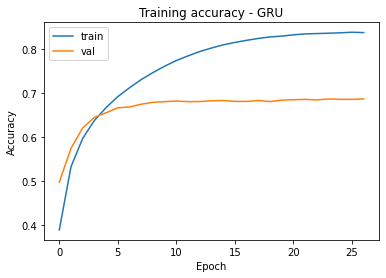

In [ ]:
plt.subplot(1,1,1)
plt.plot(GRU_history.history['accuracy'])
plt.plot(GRU_history.history['val_accuracy'])
plt.title("Training accuracy - GRU")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','val'], loc="upper left")

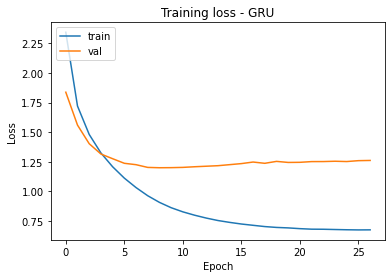

In [ ]:
plt.subplot(1,1,1)
plt.plot(GRU_history.history['loss'])
plt.plot(GRU_history.history['val_loss'])
plt.title("Training loss - GRU")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'], loc="upper left")

#### SAVE MODEL

In [ ]:
model_save_path = os.path.join(WORKING_DIR + "MODEL/seq2seq_gru.h5")
seq2seq_gru.save(model_save_path)
seq2seq_gru.save('seq2seq_gru.h5')

In [ ]:
seq2seq_gru.save_weights(WORKING_DIR+ 'SAVE WEIGHT/GRU_weight')

In [ ]:
np.save('GRU_history.npy',GRU_history.history)

#### LOAD MODEL

In [ ]:
model_path='/content/drive/MyDrive/DS301 NLP/MACHINE TRANSLATION MODEL/GRU model/'

In [ ]:
seq2seq_gru = keras.models.load_model(model_path+ 'seq2seq_gru.h5')

In [ ]:
#phần này chiều hỏi lại dct
with open(os.path.join( model_path+"GRU_history.npy"), "rb") as his:
    GRU_history = pickle.load(his)

### LSTM

#### LSTM-BASED ENCODER

In [ ]:

# Define an input sequence and process it.
embed_dim = 256
latent_dim = 1024

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="vie")
x = Embedding(vocab_size, embed_dim, mask_zero=True)(encoder_inputs)
x, state_h, state_c = LSTM(latent_dim,
                           return_state=True)(x)
encoder_states = [state_h, state_c]


#### LSTM-BASED DECODER AND THE END-TO-END MODEL

In [ ]:

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="english")
x = Embedding(vocab_size, embed_dim, mask_zero=True)(decoder_inputs)
x = LSTM(latent_dim, return_sequences=True)(x, initial_state=encoder_states)
x = layers.Dropout(0.5)(x)
decoder_outputs = Dense(vocab_size, activation='softmax')(x)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
seq2seq_lstm = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile & run training
seq2seq_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy')
# Note that `decoder_target_data` needs to be one-hot encoded,
# rather than sequences of integers like `decoder_input_data`!


#### TRAINING MODEL

In [ ]:
seq2seq_lstm.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])


In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='lstm_cp.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
LSTM_history=seq2seq_lstm.fit(train_ds, epochs=51, validation_data=val_ds,callbacks = [cp_callback])

Epoch 1/51
438/438 [==============================] - ETA: 0s - loss: 2.5139 - accuracy: 0.3463
Epoch 1: saving model to lstm_cp.ckpt
438/438 [==============================] - 58s 104ms/step - loss: 2.5139 - accuracy: 0.3463 - val_loss: 2.1023 - val_accuracy: 0.4250
Epoch 2/51
438/438 [==============================] - ETA: 0s - loss: 2.0068 - accuracy: 0.4523
Epoch 2: saving model to lstm_cp.ckpt
438/438 [==============================] - 43s 98ms/step - loss: 2.0068 - accuracy: 0.4523 - val_loss: 1.8756 - val_accuracy: 0.4808
Epoch 3/51
438/438 [==============================] - ETA: 0s - loss: 1.8005 - accuracy: 0.5004
Epoch 3: saving model to lstm_cp.ckpt
438/438 [==============================] - 43s 98ms/step - loss: 1.8005 - accuracy: 0.5004 - val_loss: 1.6968 - val_accuracy: 0.5295
Epoch 4/51
438/438 [==============================] - ETA: 0s - loss: 1.6296 - accuracy: 0.5451
Epoch 4: saving model to lstm_cp.ckpt
438/438 [==============================] - 42s 96ms/step - loss:

#### PLOT

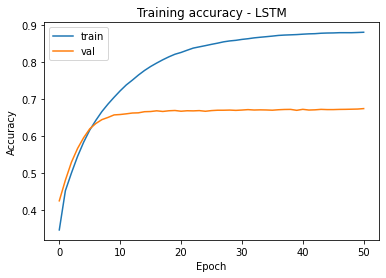

In [ ]:
plt.subplot(1,1,1)
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.title("Training accuracy - LSTM")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','val'], loc="upper left")

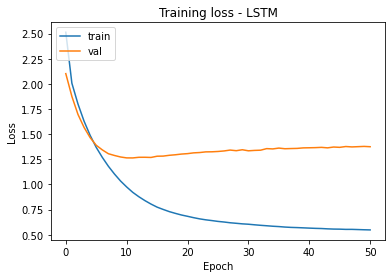

In [ ]:
plt.subplot(1,1,1)
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title("Training loss - LSTM")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'], loc="upper left")

#### SAVE MODEL

In [ ]:
model_save_path = os.path.join(WORKING_DIR + "MODEL/seq2seq_lstm.h5")
seq2seq_lstm.save(model_save_path)
seq2seq_lstm.save('seq2seq_lstm.h5')

In [ ]:
seq2seq_lstm.save_weights(WORKING_DIR+ 'SAVE WEIGHT/LSTM_weight')

In [ ]:
np.save('LSTM_history.npy',LSTM_history.history)

#### LOAD MODEL

In [ ]:
model_path='/content/drive/MyDrive/DS301 NLP/MACHINE TRANSLATION MODEL/LSTM model/'

In [ ]:
seq2seq_lstm = keras.models.load_model(model_path+ 'seq2seq_lstm.h5')

In [ ]:
#phần này chiều hỏi lại dct
with open(os.path.join( model_path+"LSTM_history.npy"), "rb") as his:
    LSTM_history = pickle.load(his)

## TRANSLATE

### GRU

In [ ]:
english_vocab = target_vectorization.get_vocabulary()
english_index_lookup = dict(zip(range(len(english_vocab)), english_vocab))
max_decoded_sentence_length = 20


def decode_sequence_gru(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization([decoded_sentence])[:, :-1]
        predictions  = seq2seq_gru([tokenized_input_sentence, tokenized_target_sentence])

        sampled_token_index = np.argmax(predictions [0, i, :])
        sampled_token = english_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token

        if sampled_token == "[end]":
            break
    return decoded_sentence

In [ ]:
#chỉ cần nhập cái câu cần dịch vô input là được
translation_input="Một quả bóng nảy vàng đang đặt dưới đất cạnh chiếc bàn gỗ."

#xoá end vs start
translated = decode_sequence_gru(translation_input)
translation_split=translated.split(" ")
del translation_split[0]
del translation_split[-1]
translation_sentence=(" ".join(translation_split))
print(translation_sentence)

a yellow is laying in the grass by the wooden fence


### LSTM

In [ ]:
english_vocab = target_vectorization.get_vocabulary()
english_index_lookup = dict(zip(range(len(english_vocab)), english_vocab))
max_decoded_sentence_length = 20

def decode_sequence_lstm(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization([decoded_sentence])[:, :-1]
        predictions  = seq2seq_lstm([tokenized_input_sentence, tokenized_target_sentence])
        sampled_token_index = np.argmax(predictions [0, i, :])
        sampled_token = english_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token
        if sampled_token == "[end]":
            break
    return decoded_sentence

In [ ]:
#chỉ cần nhập cái câu cần dịch vô input là được
translation_input="Một quả bóng nảy vàng đang đặt dưới đất cạnh chiếc bàn gỗ."

#xoá end vs start
translated = decode_sequence_lstm(translation_input)
translation_split=translated.split(" ")
del translation_split[0]
del translation_split[-1]
translation_sentence=(" ".join(translation_split))
print(translation_sentence)

a golden retriever is being along a wooden fence


## EVALUATE

In [ ]:
test_vie_texts = [pair[0] for pair in test_pairs]
test_english_texts = [pair[1] for pair in test_pairs]

###  SPLIT ENGLISH DATASET

In [ ]:
actual = list()
for i in test_english_texts:
      a=i.split()
      del a[0]
      del a[-1]
      actual.append(a)
      print(a)

Streaming output truncated to the last 5000 lines.
['The', 'white', 'dog', 'is', 'playing', 'in', 'a', 'green', 'field', 'with', 'a', 'yellow', 'toy', '.']
['A', 'white-footed', 'beagle', 'plays', 'with', 'a', 'tennis', 'ball', 'on', 'a', 'garden', 'path', '.']
['A', 'group', 'of', 'Asian', 'teenagers', 'are', 'holding', 'flags', 'on', 'a', 'street', '.']
['A', 'dog', 'runs', 'on', 'wet', 'sand', 'as', 'a', 'man', 'in', 'yellow', 'pants', 'walks', 'further', 'back', '.']
['Two', 'female', 'baseball', 'players', 'reach', 'for', 'the', 'ball', '.']
['A', 'black', 'dog', 'chasing', 'another', 'black', 'dog', 'down', 'a', 'grass', 'covered', 'hill', '.']
['Three', 'young', 'boys', 'playing', 'outside', 'and', 'posing', 'for', 'a', 'picture']
['People', 'stand', 'on', 'a', 'colorful', 'balcony', '.']
['Three', 'small', 'boys', 'play', 'basketball', 'indoors', '.']
['A', 'woman', 'dances', 'along', 'with', 'a', 'dancing', 'video-game', 'projected', 'on', 'large', 'screen', 'behind', 'her', '

### GRU

#### TRANSLATION AND SPLIT DATA

In [ ]:
translation = list()
for i in test_vie_texts:
      a=decode_sequence_gru(i).split()
      del a[0]
      del a[-1]
      translation.append(a)

#### EVALUATE (BLEU-SCORE)

In [ ]:
if len(actual) != len(translation):
    raise ValueError('The number of sentences in both files do not match.')

score1 = 0
score2 = 0
score3 = 0
score4 = 0

for i in range(len(actual)):
    score1 += sentence_bleu([actual[i]],  translation[i], weights=(1, 0, 0, 0))
    score2 += sentence_bleu([actual[i]],  translation[i], weights=(0.5, 0.5, 0, 0))
    score3 += sentence_bleu([actual[i]],  translation[i], weights=(0.33, 0.33, 0.33, 0))
    score4 += sentence_bleu([actual[i]],  translation[i], weights=(0.25, 0.25, 0.25, 0.25))

score1 /= len(actual)
score2 /= len(actual)
score3 /= len(actual)
score4 /= len(actual)
print("The bleu 1-gram is: "+str(score1))
print("The bleu 2-gram is: "+str(score2))
print("The bleu 3-gram is: "+str(score3))
print("The bleu 4-gram is: "+str(score4))

/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

The bleu 1-gram is: 0.5041763966153079
The bleu 2-gram is: 0.38161282456711787
The bleu 3-gram is: 0.28143034420295027
The bleu 4-gram is: 0.19563990173886892


### LSTM

#### TRANSLATION AND SPLIT DATA

In [ ]:
translation = list()
for i in test_vie_texts:
      a=decode_sequence_lstm(i).split()
      del a[0]
      del a[-1]
      translation.append(a)

#### EVALUATE (BLEU-SCORE)

In [ ]:
if len(actual) != len(translation):
    raise ValueError('The number of sentences in both files do not match.')

score1 = 0
score2 = 0
score3 = 0
score4 = 0

for i in range(len(actual)):
    score1 += sentence_bleu([actual[i]],  translation[i], weights=(1, 0, 0, 0))
    score2 += sentence_bleu([actual[i]],  translation[i], weights=(0.5, 0.5, 0, 0))
    score3 += sentence_bleu([actual[i]],  translation[i], weights=(0.33, 0.33, 0.33, 0))
    score4 += sentence_bleu([actual[i]],  translation[i], weights=(0.25, 0.25, 0.25, 0.25))

score1 /= len(actual)
score2 /= len(actual)
score3 /= len(actual)
score4 /= len(actual)
print("The bleu 1-gram is: "+str(score1))
print("The bleu 2-gram is: "+str(score2))
print("The bleu 3-gram is: "+str(score3))
print("The bleu 4-gram is: "+str(score4))

The bleu 1-gram is: 0.4925550252666754
The bleu 2-gram is: 0.36825147063076136
The bleu 3-gram is: 0.2675337444603597
The bleu 4-gram is: 0.18384716124155884


### API GOOGLE

#### DEFINE API

In [ ]:
def Machine_Translation(sentence):
  translator = Translator()
  translated = translator.translate(sentence, dest = 'en', src = 'vi')
  return translated.text

#### TRANSLATION AND SPLIT DATA

In [ ]:
translation = list()
#translation test_vie_test from 1 to 1000
for i in range(1,1000):
      a=Machine_Translation(test_vie_texts[i]).split()
      translation.append(a)

In [ ]:
#translation test_vie_test from 1001 to 2000
for i in range(1000,2000):
      a=Machine_Translation(test_vie_texts[i]).split()
      translation.append(a)

In [ ]:
#translation test_vie_test from 2001 to 3000
for i in range(2000,3000):
      a=Machine_Translation(test_vie_texts[i]).split()
      translation.append(a)

In [ ]:
#translation test_vie_test from 4001 to 5000
for i in range(4000,5000):
      a=Machine_Translation(test_vie_texts[i]).split()
      translation.append(a)

In [ ]:
#translation test_vie_test from 4001 to 5000
for i in range(5000,6000):
      a=Machine_Translation(test_vie_texts[i]).split()
      translation.append(a)

#### EVALUATE (BLEU-SCORE)

In [ ]:
if len(actual) != len(translation):
    raise ValueError('The number of sentences in both files do not match.')

score1 = 0
score2 = 0
score3 = 0
score4 = 0

for i in range(len(actual)):
    score1 += sentence_bleu([actual[i]],  translation[i], weights=(1, 0, 0, 0))
    score2 += sentence_bleu([actual[i]],  translation[i], weights=(0.5, 0.5, 0, 0))
    score3 += sentence_bleu([actual[i]],  translation[i], weights=(0.33, 0.33, 0.33, 0))
    score4 += sentence_bleu([actual[i]],  translation[i], weights=(0.25, 0.25, 0.25, 0.25))

score1 /= len(actual)
score2 /= len(actual)
score3 /= len(actual)
score4 /= len(actual)
print("The bleu 1-gram is: "+str(score1))
print("The bleu 2-gram is: "+str(score2))
print("The bleu 3-gram is: "+str(score3))
print("The bleu 4-gram is: "+str(score4))

/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

The bleu 1-gram is: 0.5406901133541105
The bleu 2-gram is: 0.418818686413679
The bleu 3-gram is: 0.30593988133077027
The bleu 4-gram is: 0.2074668281676587


## CREATE PIPELINE

### LOAD NEEDED-FUNCTION

In [ ]:
DATA_DIR="/content/drive/MyDrive/Học tập/ANH EM XÃ HỘI/DS310 - ĐỒ ÁN NHÓM/CODE/MACHINE TRANSLATION MODEL/DATA/"
GRU_MODEL_DIR='/content/drive/MyDrive/Học tập/ANH EM XÃ HỘI/DS310 - ĐỒ ÁN NHÓM/CODE/MACHINE TRANSLATION MODEL/GRU model/'
LSTM_MODEL_DIR='/content/drive/MyDrive/Học tập/ANH EM XÃ HỘI/DS310 - ĐỒ ÁN NHÓM/CODE/MACHINE TRANSLATION MODEL/LSTM model/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#PREPARING DATASET
data=pd.read_csv(DATA_DIR +'data.csv')
vie = data['vie'].values.tolist()
english = data['english'].values.tolist()
text_pairs = list(zip(vie, english))
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]

strip_chars = string.punctuation + "¿"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

#VECTORIZING
def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", "")

vocab_size = 15000
sequence_length = 20

source_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)
target_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization,
)
train_vie_texts = [pair[0] for pair in train_pairs]
train_english_texts = [pair[1] for pair in train_pairs]
source_vectorization.adapt(train_vie_texts)
target_vectorization.adapt(train_english_texts)

#LOAD MODEL
seq2seq_lstm = keras.models.load_model(LSTM_MODEL_DIR+ 'seq2seq_lstm.h5')
seq2seq_gru = keras.models.load_model(GRU_MODEL_DIR+ 'seq2seq_gru.h5')

#TRANSLATION FUNTION
english_vocab = target_vectorization.get_vocabulary()
english_index_lookup = dict(zip(range(len(english_vocab)), english_vocab))
max_decoded_sentence_length = 20
def decode_sequence_gru(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization([decoded_sentence])[:, :-1]
        predictions  = seq2seq_gru([tokenized_input_sentence, tokenized_target_sentence])

        sampled_token_index = np.argmax(predictions [0, i, :])
        sampled_token = english_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token

        if sampled_token == "[end]":
            break
    decoded_sentence
    translation_split=decoded_sentence.split(" ")
    del translation_split[0]
    del translation_split[-1]
    translation_sentence=(" ".join(translation_split))
    return translation_sentence

In [ ]:
decode_sequence_gru("vận động viên")

'snowboarder after'

# **SHOW DEMO**

In [ ]:
def image_captioning(image):
  features = {}
  image = img_to_array(image)
  image = image.reshape((1, 480, 480, 3))
  image = efficientnet_v2.preprocess_input(image)
  #extract feature
  features = model_extract_EfficientNetV2L.predict(image, verbose = 0)
  #predict caption
  in_text = 'startseq'
  for i in range(max_length):
    sequence = tokenizer.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], max_length)
    yhat = LSTM_EfficientNetV2L_model.predict([features, sequence], verbose=0)
    yhat = np.argmax(yhat)
    word = idx_to_word(yhat, tokenizer)
    if word is None:
      break
    in_text += " " + word
    if word == 'endseq':
      break
  y_pred = in_text
  return preprocess_output(y_pred)

demo = gr.Interface(fn = image_captioning, inputs = gr.Image(shape=(480, 480)), outputs="text")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>